In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Statistical Data Visualisation
from datetime import datetime # To turn strings into dates and other date/time tranformations

In [2]:
temps = pd.read_csv('GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv')

In [3]:
temps.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [4]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [5]:
temps.isnull().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [6]:
len(temps['City'].unique())# The Number of Cities included in the dataset

100

In [8]:
# Descriptive Statistics of the numerical variables in the dataset (AverageTemperature & AverageTemperatureUncertainty)
temps.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [12]:
# Descriptive Statistics of the numerical variables for each city. Something that stands out is the significantly varying number
# of observations for each city.
temps.groupby('City')['AverageTemperature'].describe()

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Abidjan,1777.0,26.163737,1.403715,22.363,25.11400,26.2240,27.18300,29.923
Addis Abeba,1679.0,17.525073,1.223339,14.528,16.56900,17.2930,18.47300,21.223
Ahmadabad,2448.0,26.529853,4.260933,16.792,22.92325,27.2575,29.57450,35.419
Aleppo,2479.0,17.370587,8.536599,0.670,9.26050,17.6120,25.71900,32.629
Alexandria,2666.0,20.312617,4.559545,10.227,15.98725,20.4635,24.61250,28.806
...,...,...,...,...,...,...,...,...
Tokyo,2020.0,12.555998,8.230291,-1.580,4.51450,13.1115,20.16900,27.295
Toronto,3141.0,5.773911,10.050773,-15.502,-3.95500,5.9150,15.52900,25.649
Umm Durman,1768.0,29.081291,3.747367,18.508,26.11250,30.2655,31.79150,35.700


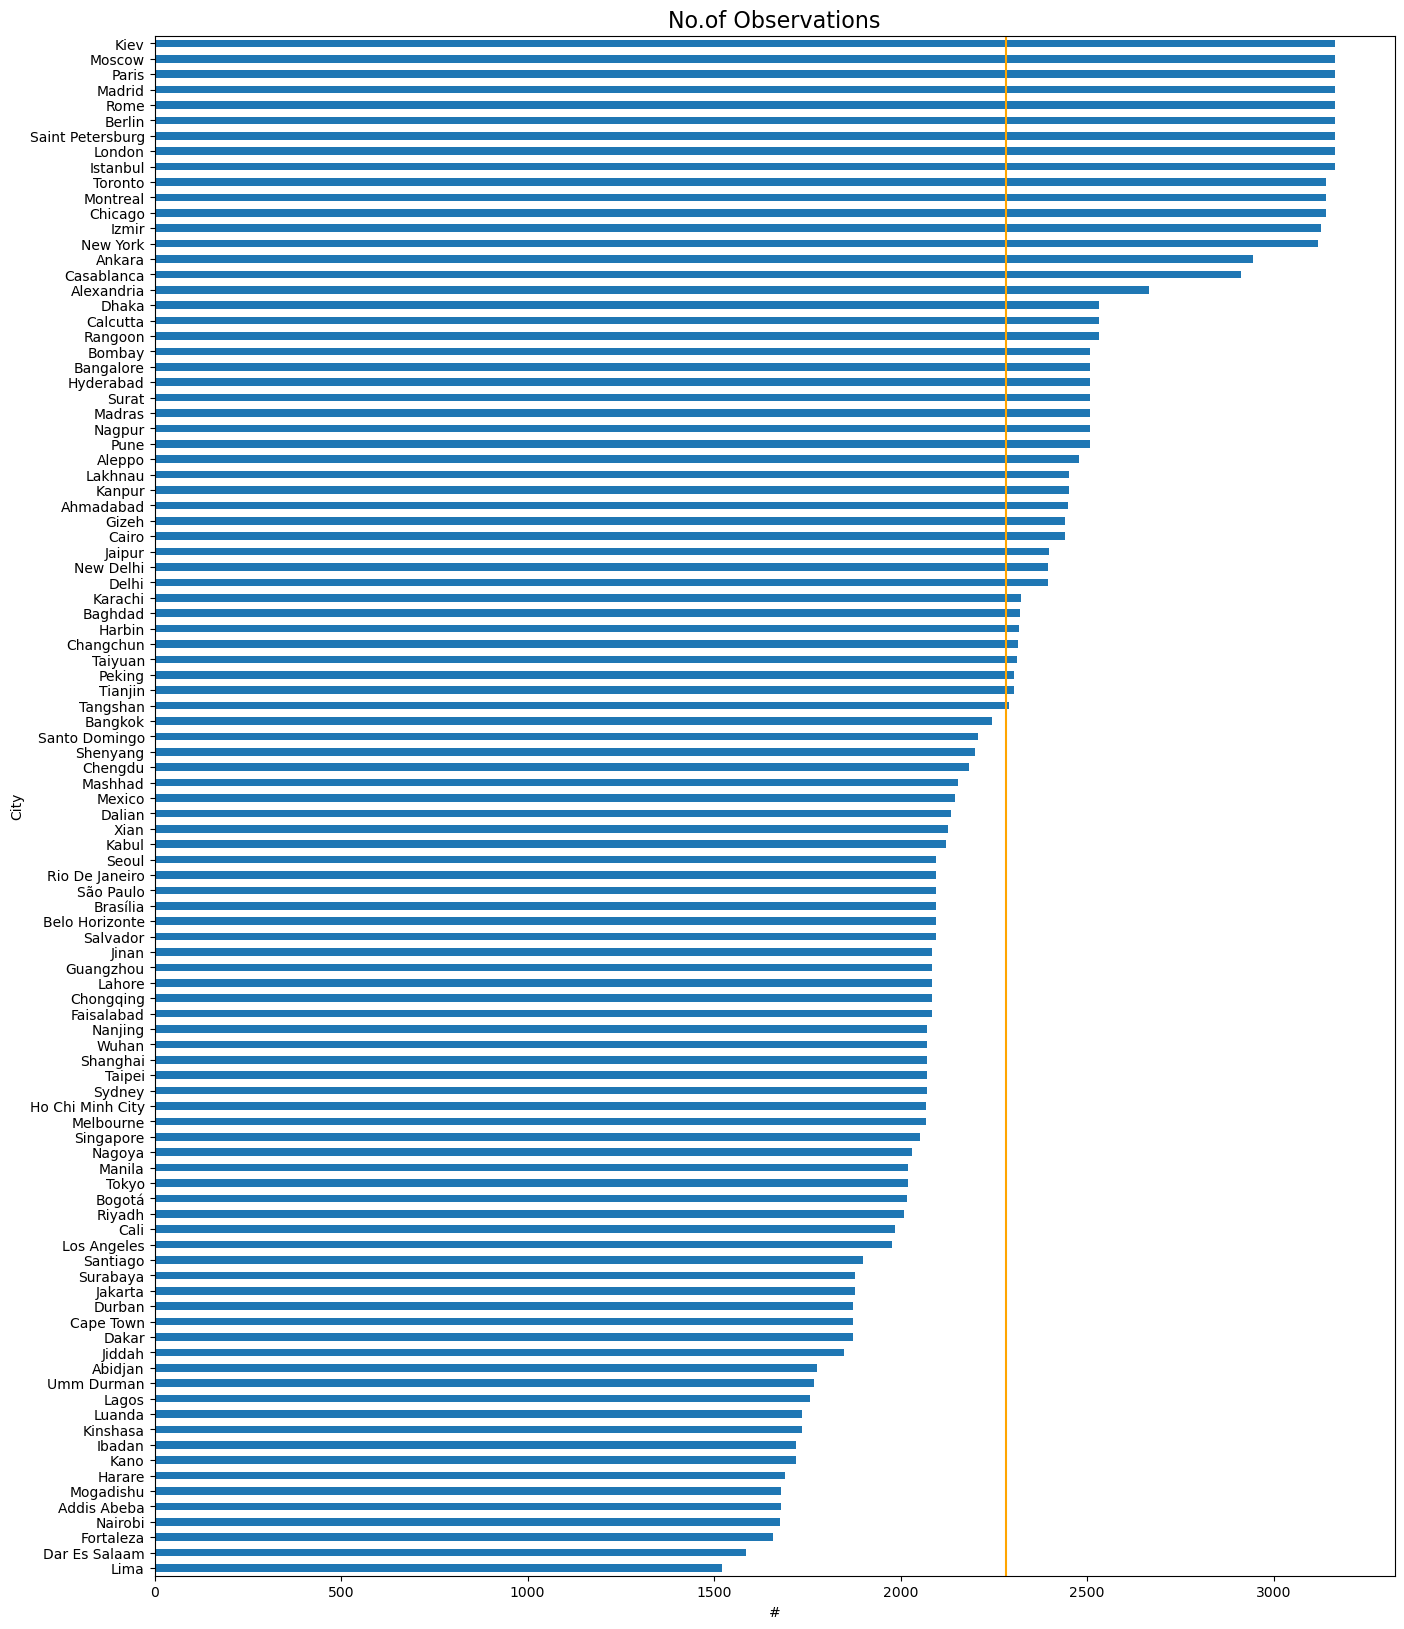

In [14]:
# We take a closer look at the available observations for each city.
obsv_per_city = temps.groupby('City')['AverageTemperature'].count().sort_values()
obsv_per_city.plot.barh(figsize = (16,20))
plt.axvline(np.mean(obsv_per_city.values), color = 'orange')
plt.title('No.of Observations', size = 16)
plt.xlabel('#')
plt.savefig('plot1.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [9]:
# Tranformation of the feature related to time into the appropriate datetime format and generation of two more 
# features, for the month and the year of the temeprature measurement, respectively.
temps['dt']  = pd.to_datetime(temps['dt'])
temps['year'] = pd.to_datetime(temps['dt']).dt.year
temps['month'] = pd.to_datetime(temps['dt']).dt.month

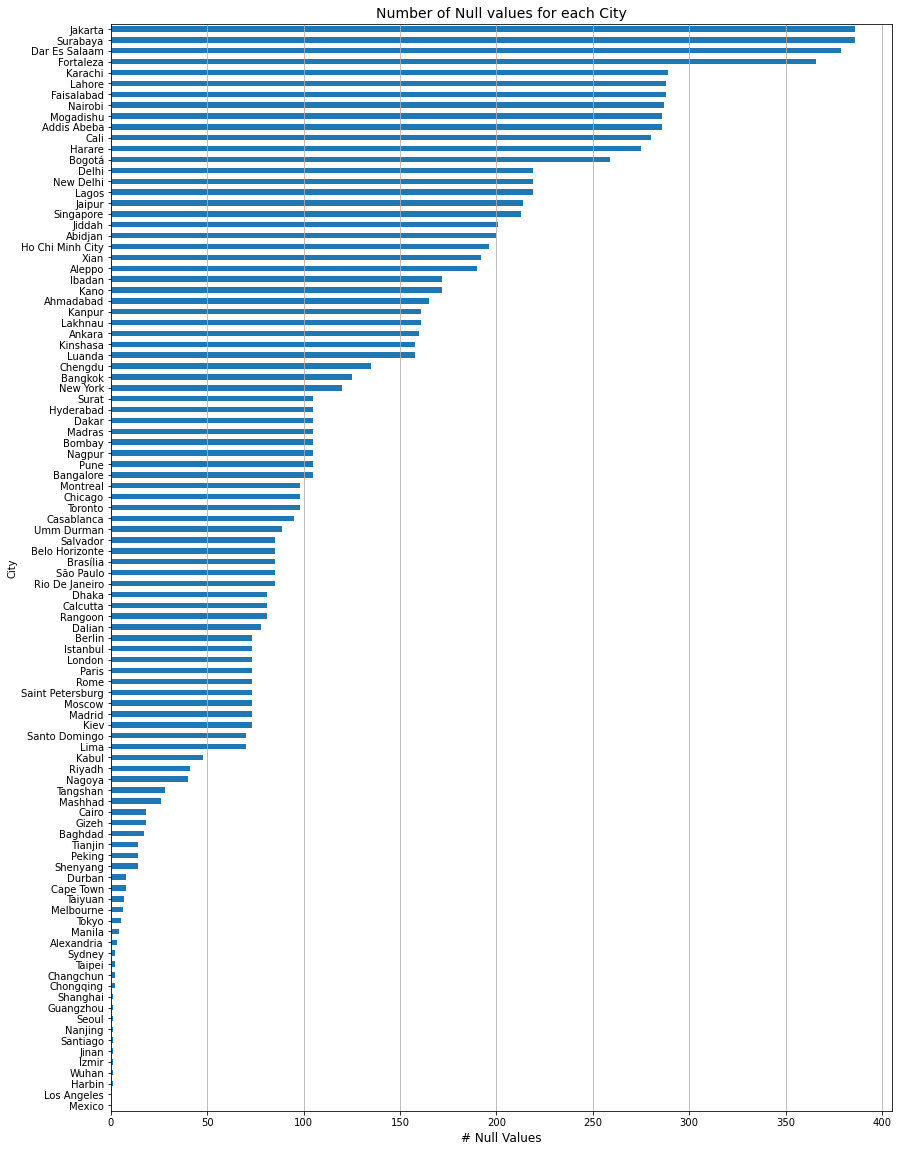

In [6]:
# At first, we aim to find a specific city to focus our analysis on. 
# To this end, we check below the number of null values for each city, in order to select one with sufficient small figure.
plt.figure(figsize = (14,20))
temps.groupby('City')['AverageTemperature'].apply(lambda x : x.isnull().sum()).sort_values().plot.barh()
plt.xlabel('# Null Values', size = 12)
plt.title('Number of Null values for each City', size = 16)
plt.grid(axis = 'x')

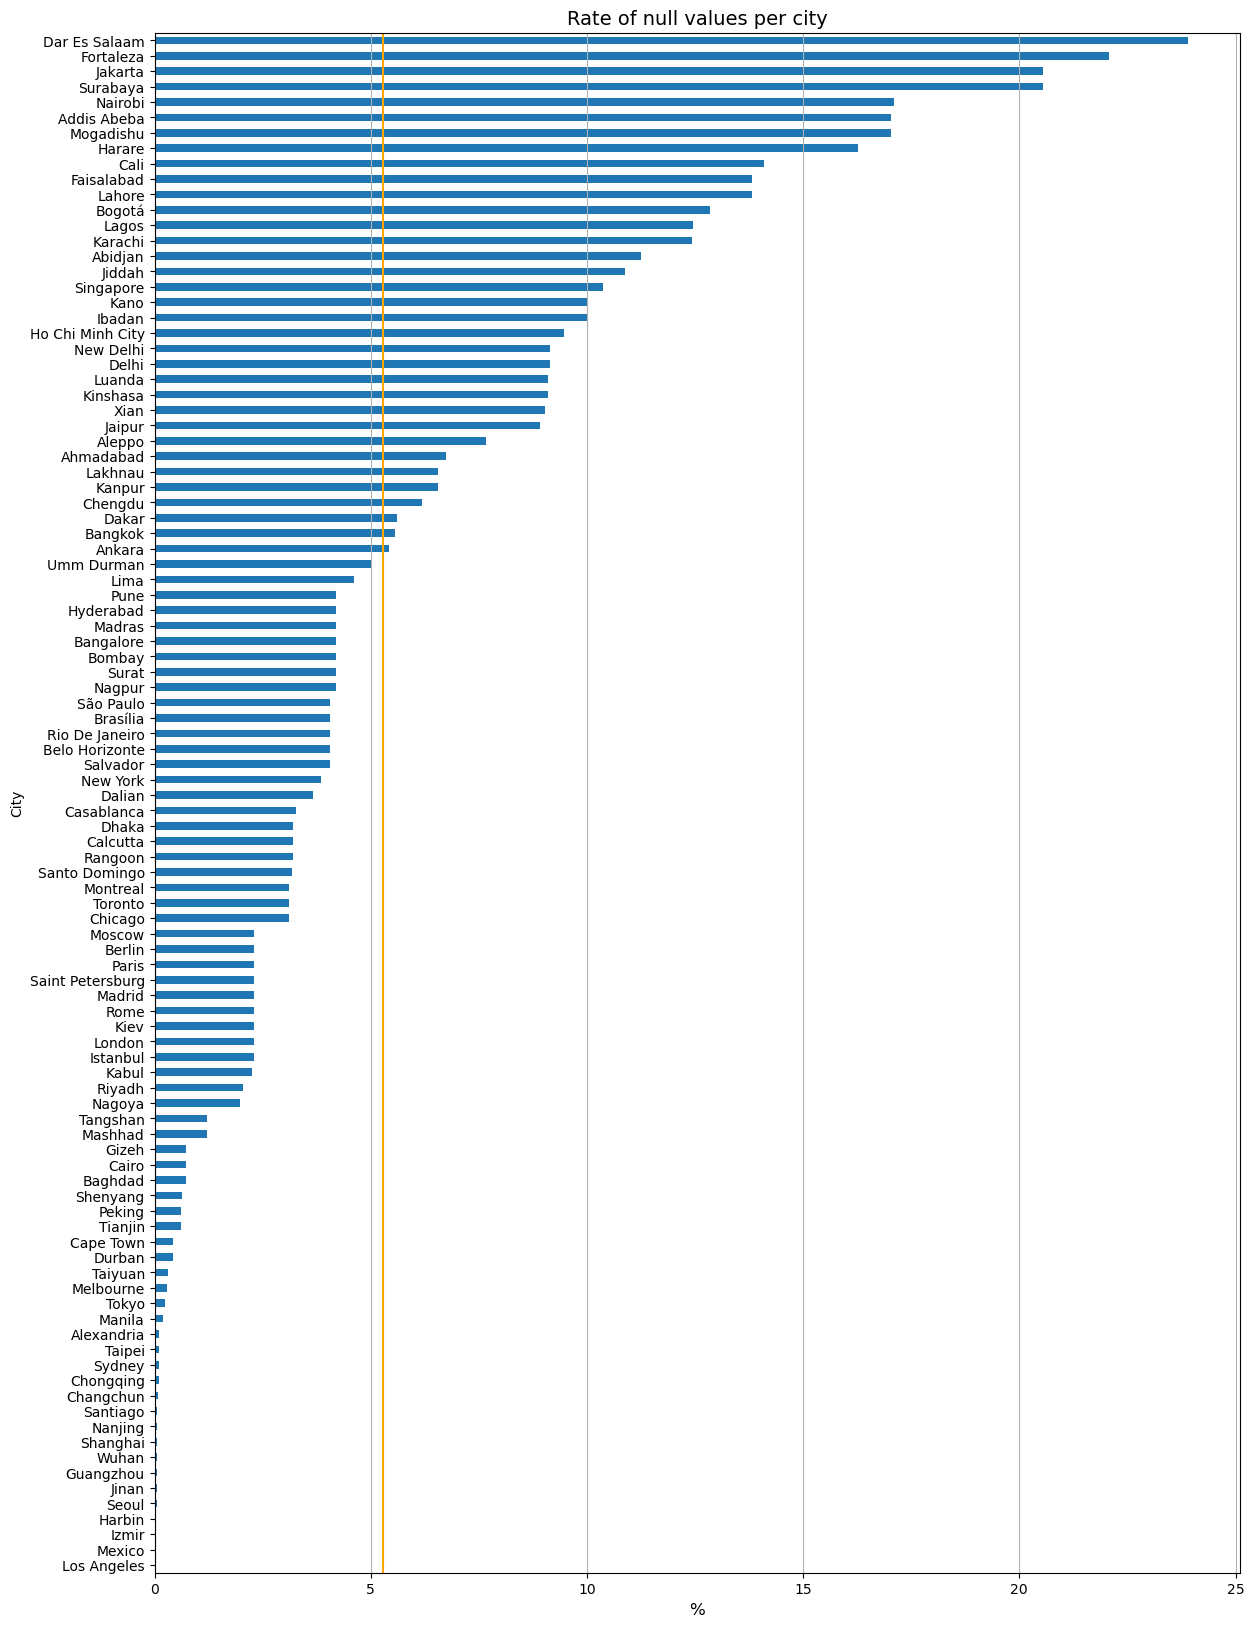

,Montreal (%),Average (%)
City,,
Montreal,3.120025,5.291562


In [13]:
# A more elaborate look at the existence of null values in our dataset (Number of null values over the total number of entries per city). 
null_rate = temps.groupby('City')['AverageTemperature'].apply(lambda x : (x.isnull().sum()/x.count())*100)
plt.figure(figsize = (14,20))
null_rate.sort_values().plot.barh()
plt.axvline(np.mean(null_rate[:].values), color = 'orange')
plt.xlabel('%', size = 12)
plt.title('Rate of null values per city', size = 14)
plt.grid(axis = 'x')
plt.savefig('plot2.png', dpi =  300, bbox_inches = 'tight')
plt.show()
pd.DataFrame({"Montreal (%)" : null_rate[null_rate.index == "Montreal"], "Average (%)" : np.mean(null_rate[:].values)})

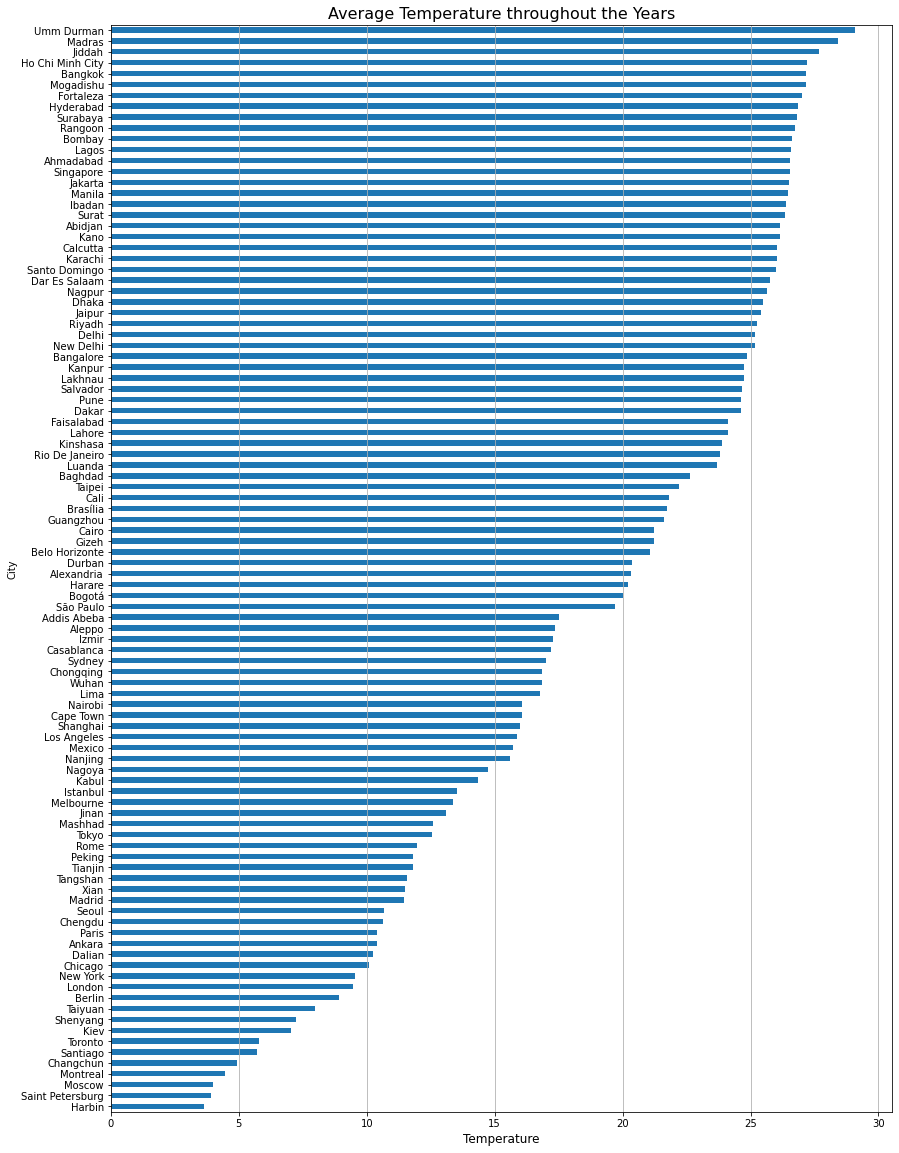

In [8]:
# As we intent to locate the city based on temperature patterns, below we get a first a look at the aggregate average temperature
# throughout the years for each city.
plt.figure(figsize = (14,20))
temps.groupby("City")['AverageTemperature'].mean().sort_values().plot.barh()
plt.xlabel('Temperature', size = 12)
plt.title("Average Temperature throughout the Years", size = 16)
plt.grid(axis = 'x')

In [10]:
# Comparing the Average Temperatures before and after 1900 on the whole, and for each city separately.
def twentieth_century(row):
    if row['year'] >= 1900:
        return 1
    else:
        return 0
temps['twentieth_century'] = temps.apply(twentieth_century, axis = 1)

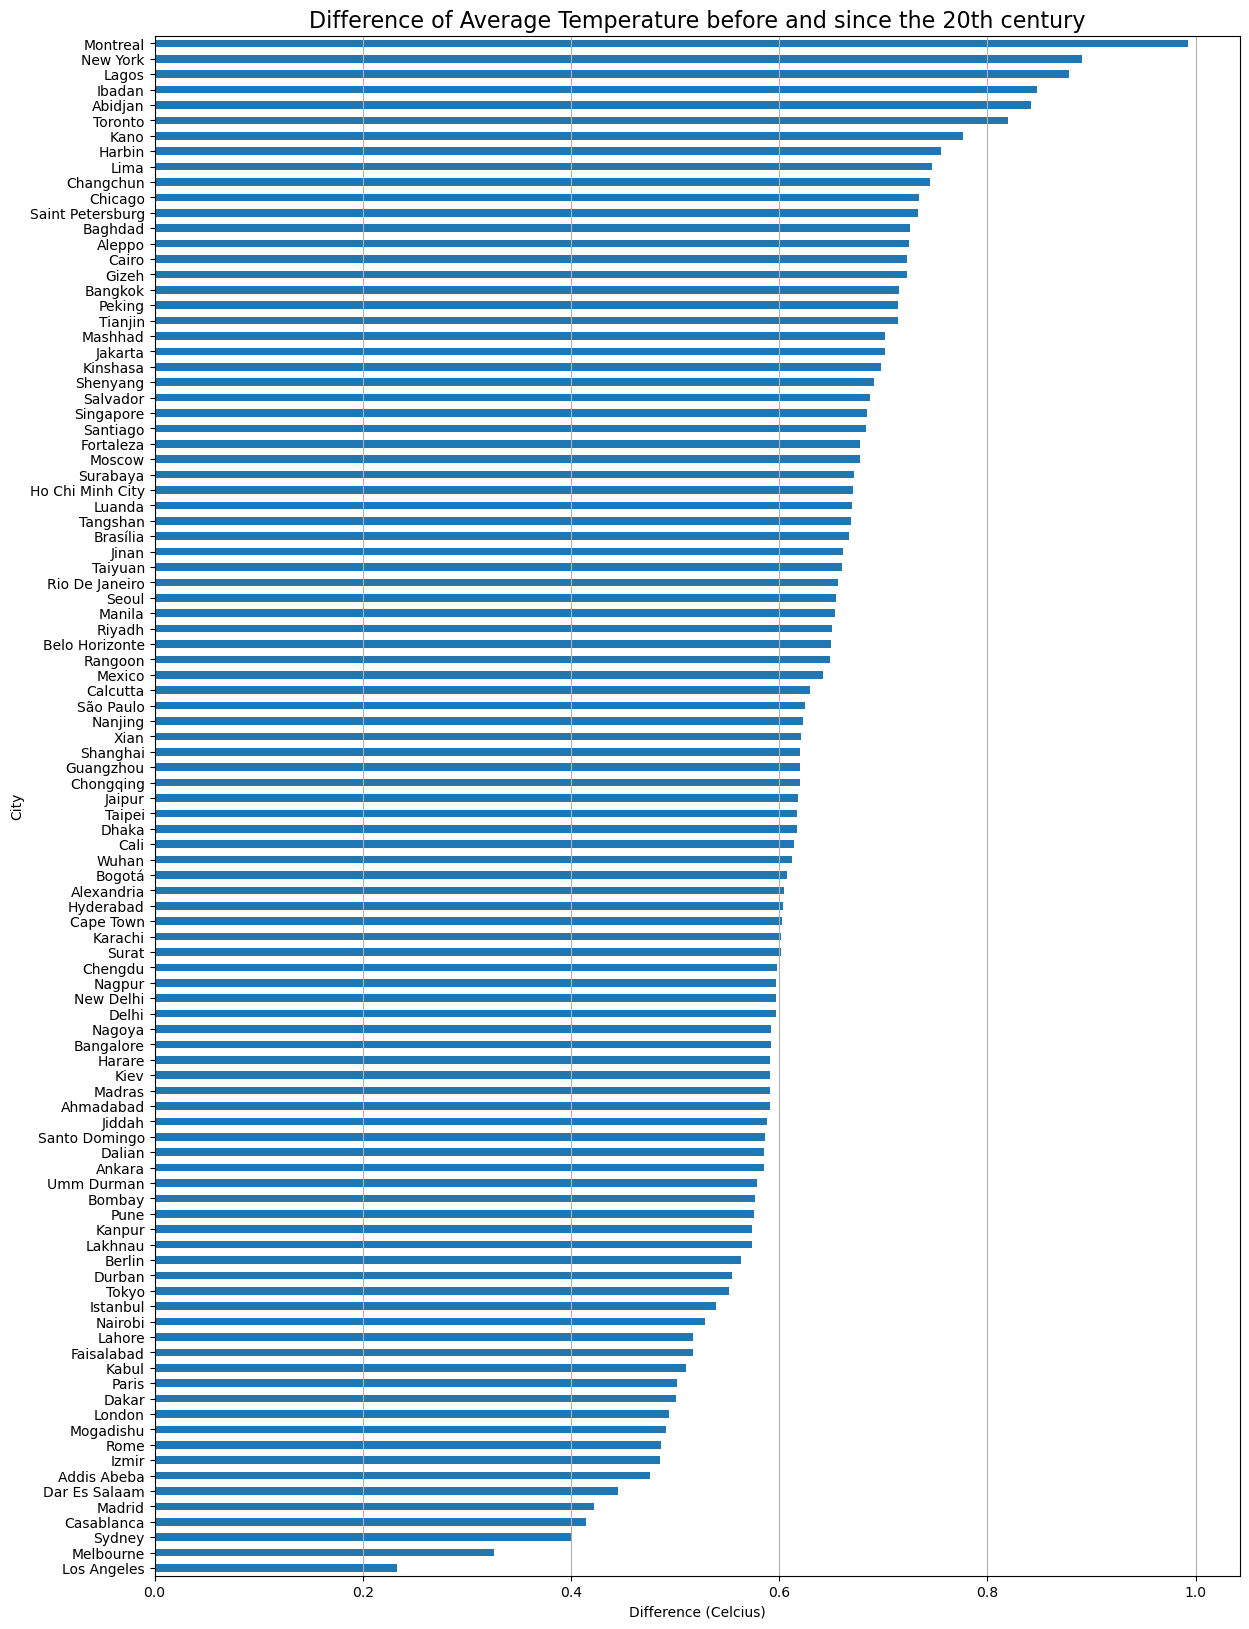

In [11]:
# We have created a dummy variable indicating whether or not the date is before or after 1900, we then group on the basis of this 
# variable and we plot the results. The city that stands out from the rest is Montreal, which has witnessed an increase of almost
# one Celsius degree on its average temperature after 1900 compared to the time period before.

# Looking back at the null value rate plot, Montreal has significantly less null values concetration in its Average Temperature
# measurement feature. Thus, Montreal is a reasonable city selection for procceeding our analysis on, this is additionally justified
# by the short null value exploration below. 
temp_diff = temps.groupby(["City","twentieth_century"])["AverageTemperature"].mean().unstack()
temp_diff['diff'] = temp_diff[1] - temp_diff[0]

plt.figure(figsize = (14,20))
temp_diff['diff'].sort_values().plot.barh()
plt.xlabel('Difference (Celcius)')
plt.title('Difference of Average Temperature before and since the 20th century', size = 16)
plt.grid(axis = 'x')
plt.savefig('plot3.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [11]:
# All missing temperature values for Montreal are between the years of 1743 and 1780. However, from previous plots, Montreal's
# null value rate is significantly below the average (3.1% compared to 5.3%) and the available observations are more than most of the
# remaining cities. So we decide to move on our investigation with Montreal by also ommiting its null values.
montreal_pre = temps[temps["City"] == "Montreal"]
montreal_pre.loc[montreal_pre["AverageTemperature"].isnull() == True,'year'].unique()

array([1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1754,
       1755, 1756, 1757, 1760, 1761, 1762, 1763, 1764, 1765, 1767, 1774,
       1778, 1780], dtype=int64)

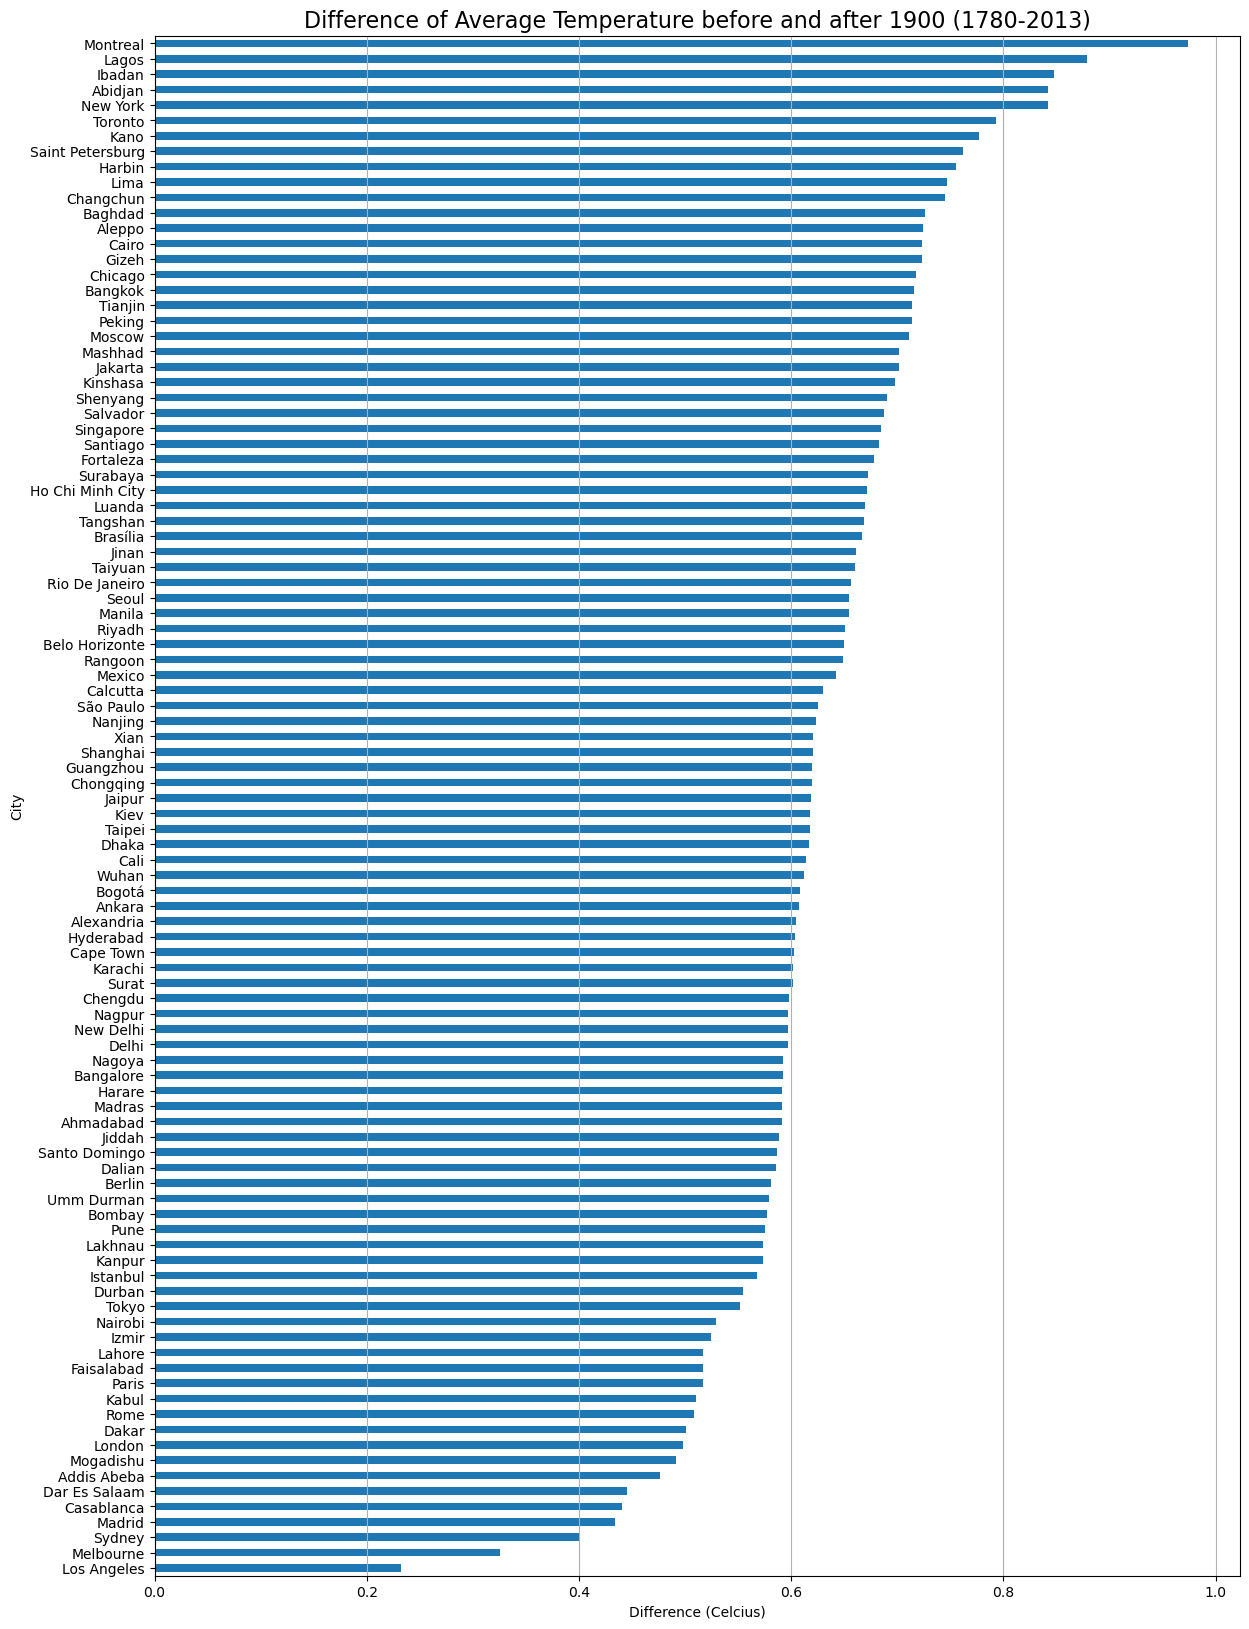

In [15]:
# We generate the same barplot, but this time only with the years after 1780. We see that Montreal remains on the top of the
# temperature change before and after 1900.
temp_diff = temps[temps['year']>1780].groupby(["City","twentieth_century"])["AverageTemperature"].mean().unstack()
temp_diff['diff'] = temp_diff[1] - temp_diff[0]

plt.figure(figsize = (14,20))
temp_diff['diff'].sort_values().plot.barh()
plt.xlabel('Difference (Celcius)')
plt.title('Difference of Average Temperature before and after 1900 (1780-2013)', size = 16)
plt.grid(axis = 'x')
plt.savefig('plot4.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [15]:
# Moreover, we see that the year of 2013 is not complete, instead the calculations stop on September. 
montreal_pre.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,twentieth_century
155191,2013-05-01,14.065,0.247,Montreal,Canada,45.81N,72.69W,2013,5,1
155192,2013-06-01,16.949,0.286,Montreal,Canada,45.81N,72.69W,2013,6,1
155193,2013-07-01,21.298,0.344,Montreal,Canada,45.81N,72.69W,2013,7,1
155194,2013-08-01,18.738,0.390,Montreal,Canada,45.81N,72.69W,2013,8,1
155195,2013-09-01,14.281,1.110,Montreal,Canada,45.81N,72.69W,2013,9,1


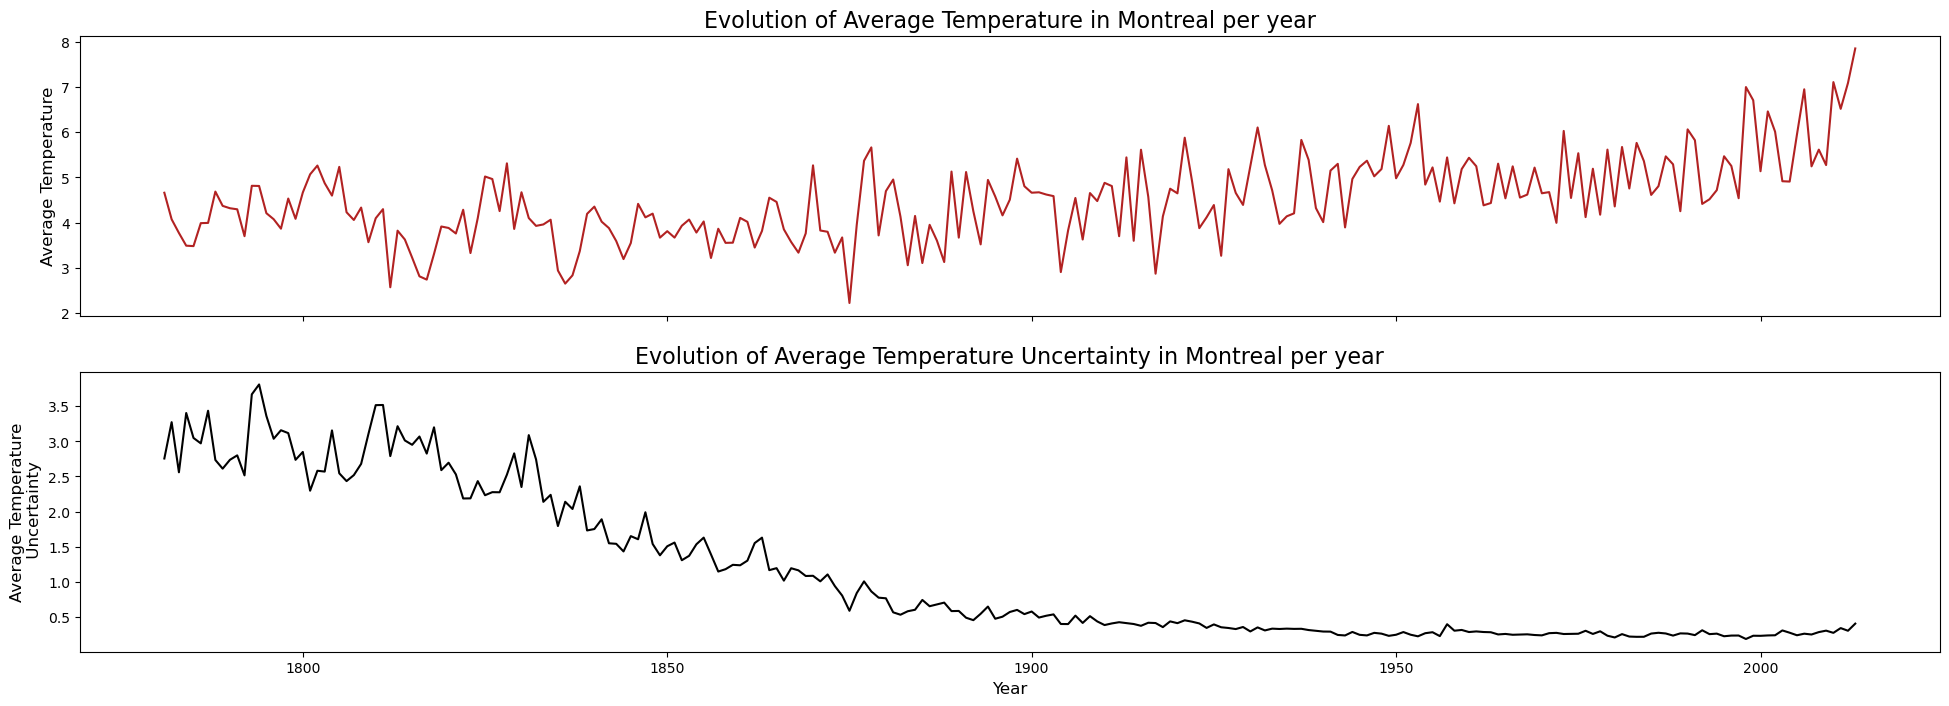

In [16]:
# Lets examine when Montreal experienced the greatest increase in its yearly average temperature figure.
# We first plot the temperature development throughtout the years under investigation. We then check the temperature uncertainty for
# the same years. We observe that there is an increasing trend in the average temperature  per year however there are constant  
# fluctuations. Moreover, the significant decrease in the standard deviation of the average temperature(uncertainty) calculations is 
# a positive sign for the validity of the further stochastic investigation.
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (24,8), sharex = True)

axs[0].plot(temps[(temps["City"] == "Montreal") & (temps["year"] >1780) ].groupby('year')['AverageTemperature'].mean(), color = 'firebrick')
axs[0].set_ylabel('Average Temperature', size = 12)
axs[0].set_title('Evolution of Average Temperature in Montreal per year', size = 16)

axs[1].set_title('Evolution of Average Temperature Uncertainty in Montreal per year', size = 16)
axs[1].plot(temps[(temps["City"] == "Montreal") & (temps["year"] >1780)].groupby('year')['AverageTemperatureUncertainty'].mean(), color = 'black')
axs[1].set_ylabel('Average Temperature\n Uncertainty', size = 12)
axs[1].set_xlabel('Year', size = 12)

plt.savefig('plot5.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [14]:
# The Stationarity of the time-series seems not to be established, mainly due to the presence of trend. Another way to obtain
# a clear view on the matter is by checking the evolution of mean and variance along time so that any trend in these plots will
# indicate clear signs of non-statinarity of the series. Stationarity condition is in the core of time-series analysis, as in part
# guarantees greater forecasting ability through standard ARIMA modelling.

montreal = temps[(temps["City"] == "Montreal")& (temps["year"] >1780)].groupby('year')['AverageTemperature'].mean()# Remove na values 

def cummulative_mean(df):
    col = [0 for i in range(len(df))]
    col[0] = df.iloc[0]
    for i in range(1,len(df),1) :
        col[i] = df.iloc[i] + col[i-1]
    for j in range(1,len(df),1):
        col[j] = col[j]/(j+1)
    return col

def cummulative_variance(df):
    col = cummulative_mean(df)
    col_var = [0 for i in range(len(df))]
    for i in range(1,len(df),1) :
        for j in range(0,i,1):
            col_var[i] += ((df.iloc[j] - col[i])**2)/i
    return col_var

# Not used at the moment.
def autocorrelation(df, lag):
    tot_var = np.var(df.iloc[:])*(len(df)-1)
    tot_mean = np.mean(df.iloc[:])
    auto_corr = [1 for i in range(0,lag,1)]
    for j in range(1,lag-1,1):
        for i in range(j+1,len(df)):
            auto_corr[j+1] += (df.iloc[i]-tot_mean)*(df.iloc[i-j]-tot_mean)
    auto_corr[1:] = [auto_corr[i]/tot_var for i in range(1,lag,1)]
    return auto_corr 

In [15]:
# Preparing the dataframe needed for plotting the cummulative mean and cummulative variance of our time series in the following step.
montreal_df = montreal.reset_index()# Turning 'year' into a feature rather than an index. 
montreal_df["mean_stationarity"] = cummulative_mean(montreal)
montreal_df['var_stationarity'] = cummulative_variance(montreal)

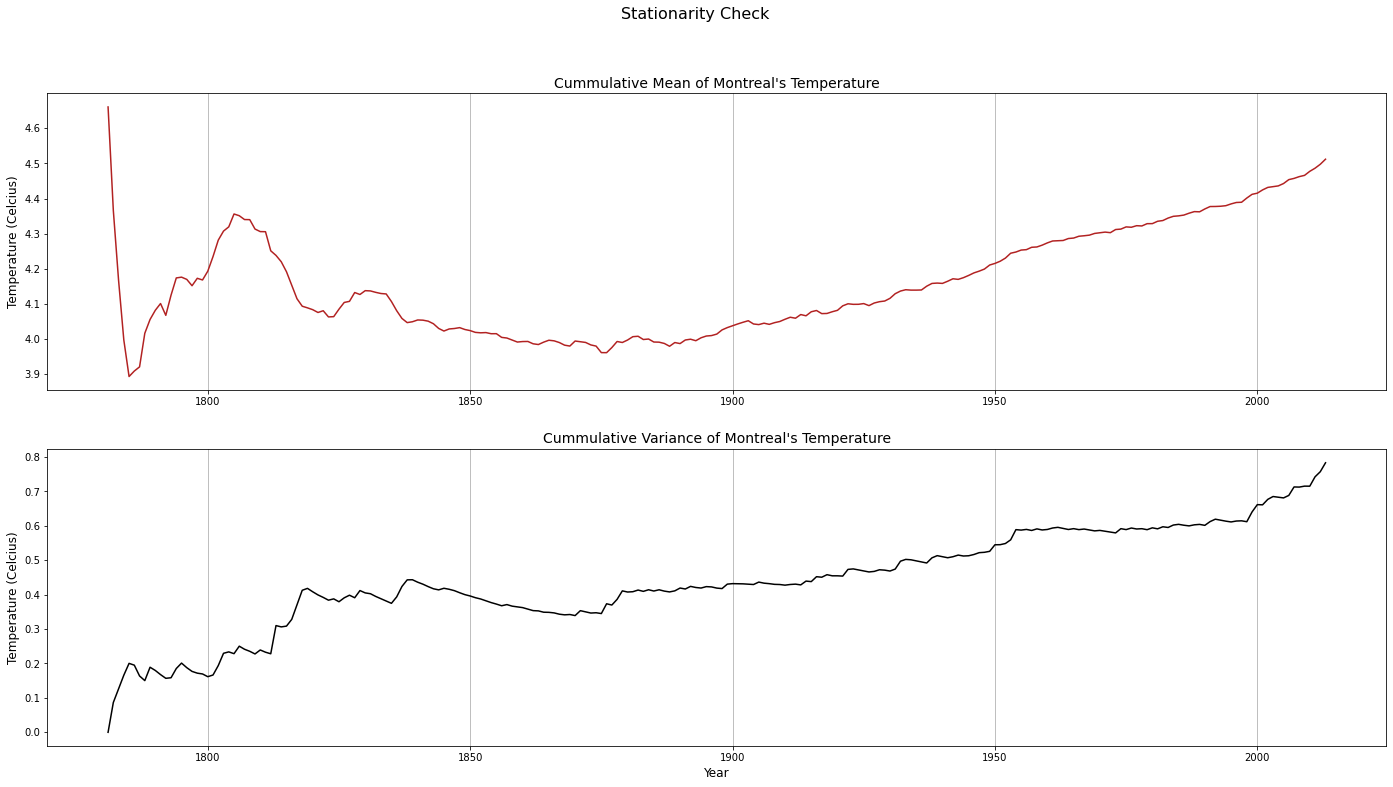

In [16]:
# It is witnessed from the two linegraphs below, that there is a dependency on time (or a trend) in both the mean and 
# the variance of temperature values. Especially, in both lines we can see a strong increasing trend in the years after 1900.
# Therefore, differencing the series for establishing stationarity might be needed, thus we embark on this examination in the 
# following steps.
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (24,12), sharex = False)
fig.suptitle("Stationarity Check", size = 16)

x_1 = montreal_df['year'];y_1 = montreal_df['mean_stationarity'];y_2 = montreal_df['var_stationarity']

axs[0].plot(x_1,y_1, color = 'firebrick')
axs[1].plot(x_1, y_2, color = 'black')
axs[0].set_ylabel('Temperature (Celcius)', size = 12)
axs[1].set_ylabel('Temperature (Celcius)', size = 12)
axs[1].set_xlabel('Year',size = 12)
axs[0].set_title("Cummulative Mean of Montreal's Temperature", size = 14)
axs[1].set_title("Cummulative Variance of Montreal's Temperature", size = 14)
axs[0].grid(axis = 'x')
axs[1].grid(axis = 'x')

In [17]:
# We employ the tactic of subtracting the time series with its own past values, the latter being described through the variable
# 'times' or how many subtractions do we perform.
def differencing(df):
    differenced = [0 for i in range(0,len(df)-1,1)]
    for i in range(len(df)-1):
            differenced[i] = df.iloc[i+1] - df.iloc[i]
    return pd.Series(index = df.index[1:] ,data = differenced, name = 'AverageTemperature')

def multiple_differencing(df, times):
    for i in range(times):
        df = differencing(df)
    return df

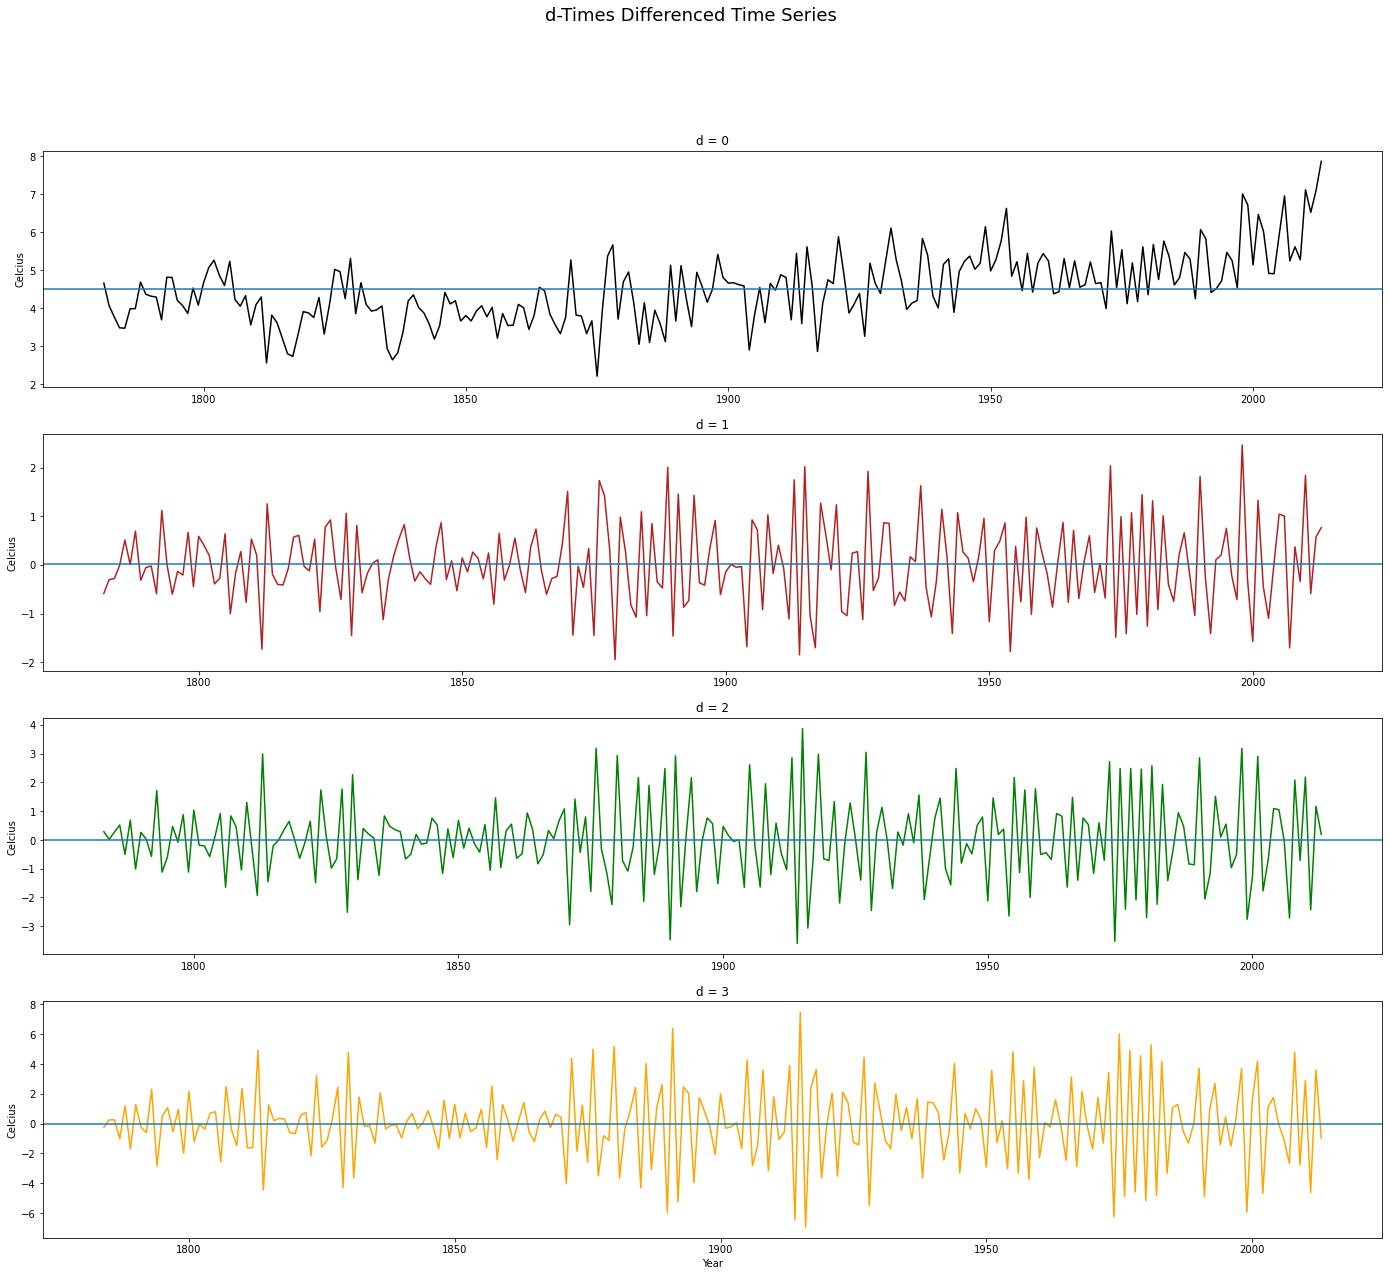

In [18]:
# We apply differencing and we then check the time-series plots of the resulted series from which we see that 
# the presence of the trend is mitigated and thus stationarity is a possibility that we investigate further.
colors = ['black', 'firebrick', 'green','orange']
fig,axs = plt.subplots(ncols = 1,nrows = 4, figsize =(24,20), sharex = 'row')
axs[3].set_xlabel('Year')

for times in range(4):
    montreal_differenced = multiple_differencing(montreal,times)
    axs[times].plot(montreal_differenced, color = colors[times])
    axs[times].axhline(np.mean(montreal_differenced.values))
    axs[times].set_ylabel('Celcius')
    axs[times].set_title(f'd = {times}', size =12)

fig.suptitle('d-Times Differenced Time Series', size = 18)
plt.show()

d = 0 | Time-Series Variance = 0.8279490686053136
d = 1 | Time-Series Variance = 0.7388621630745834
d = 2 | Time-Series Variance = 2.136368081257067
d = 3 | Time-Series Variance = 7.057978938834411


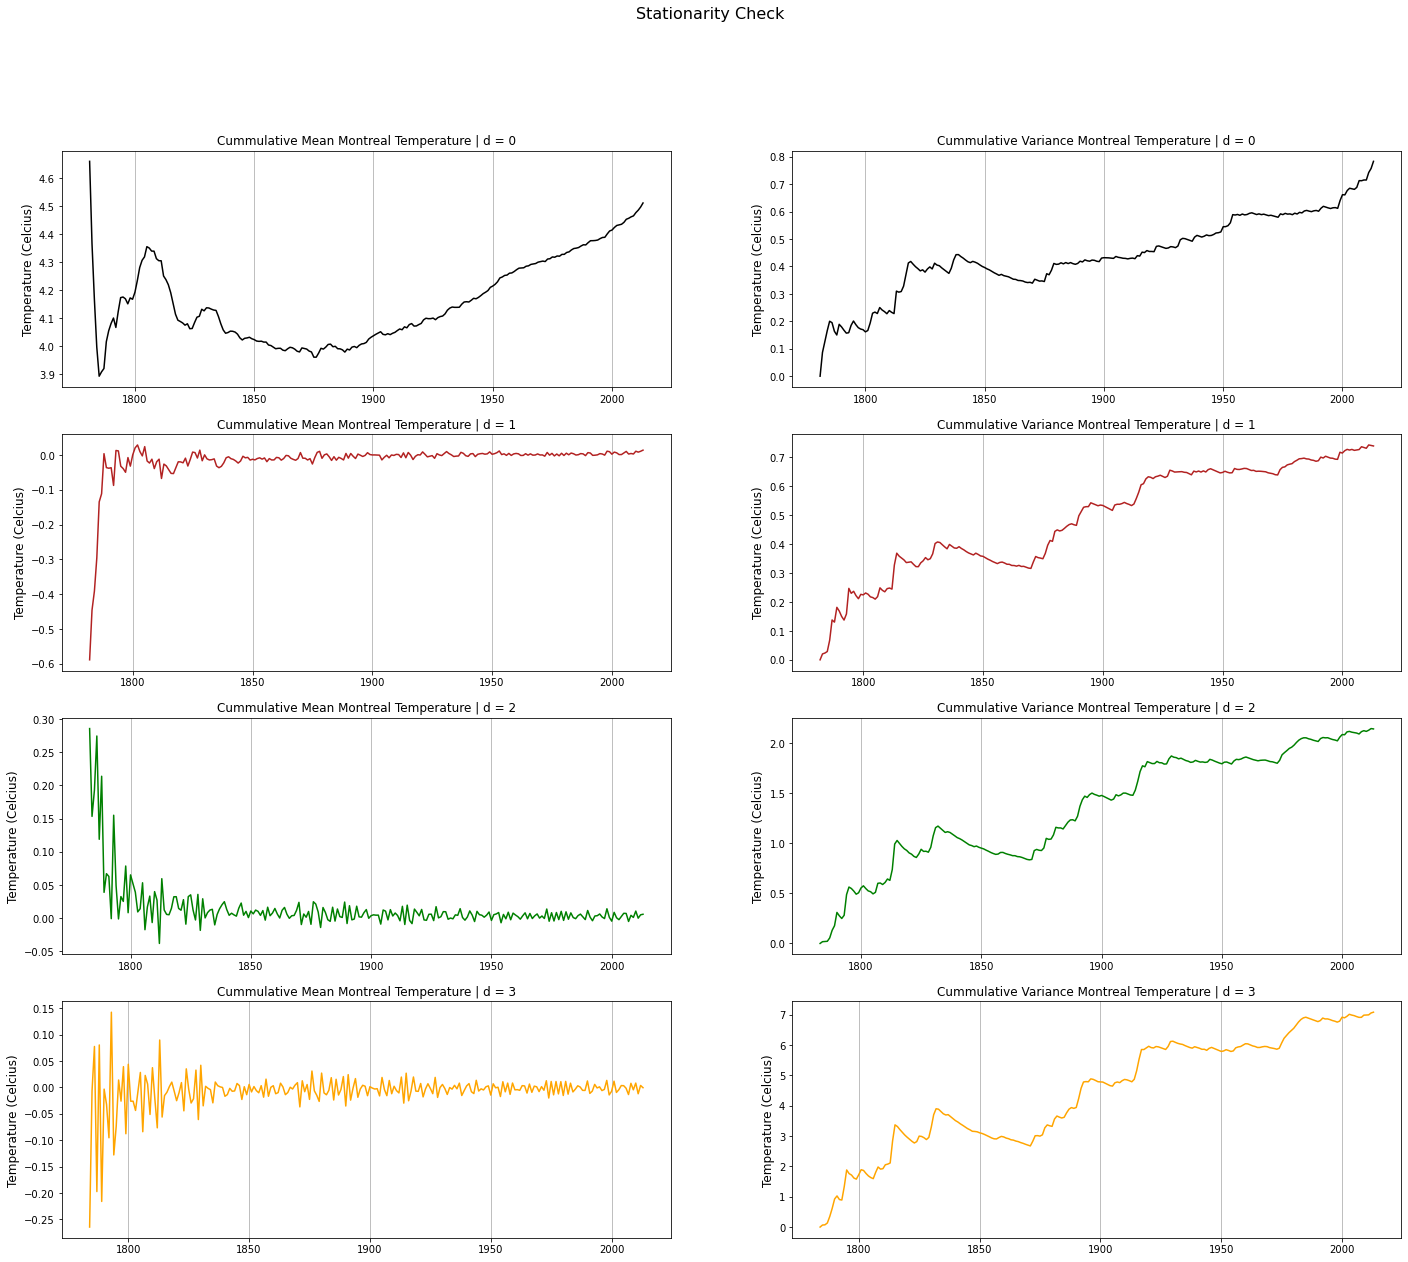

In [19]:
# Now, to assess the stationarity of the time-series we employ (again) the tools of cummulative mean and variance. We can see 
# from the following plots that both the mean and the variance are more stabilised through time after the first differenciation 
# of the time series. Hence, we decide to move forward with the single differenced time-series. We also calculate the variance 
# of each time-series as the lowest variance 
fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (24,20), sharex = False)
for times in range(0,4,1):
    montreal_differenced = multiple_differencing(montreal,times)
    montreal_differenced_df = montreal_differenced.reset_index()# Turning 'year' into a feature rather than the index. 
    montreal_differenced_df["mean_stationarity"] = cummulative_mean(montreal_differenced)
    montreal_differenced_df['var_stationarity'] = cummulative_variance(montreal_differenced)
    x = montreal_differenced_df['year'];y_1 = montreal_differenced_df['mean_stationarity'];y_2 = montreal_differenced_df['var_stationarity']
    axs[times,0].plot(x,y_1, color = colors[times])
    axs[times,1].plot(x, y_2,color = colors[times])
    axs[times,0].set_ylabel('Temperature (Celcius)', size = 12)
    axs[times,1].set_ylabel('Temperature (Celcius)', size = 12)
    #axs[times,0].set_xlabel('Year',size = 12)
    #axs[times,1].set_xlabel('Year',size = 12)
    axs[times,0].set_title(f'Cummulative Mean Montreal Temperature | d = {times}')
    axs[times,1].set_title(f'Cummulative Variance Montreal Temperature | d = {times}')
    axs[times,0].grid(axis = 'x')
    axs[times,1].grid(axis = 'x')
    print(f'd = {times} | Time-Series Variance = {np.var(montreal_differenced)}')
fig.suptitle("Stationarity Check", size = 16)
plt.show()

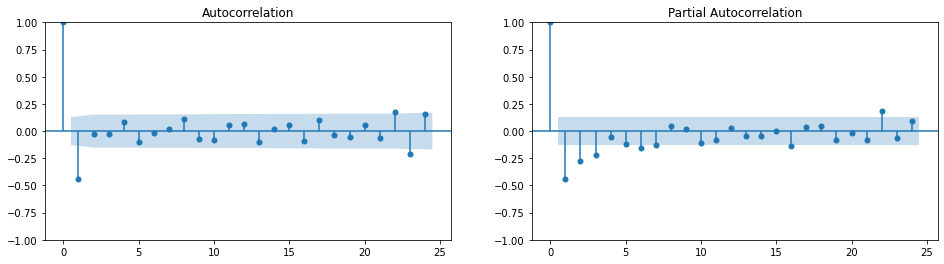

In [21]:
# After differencing the series once, we continue by investigating the Auto-Correlation and the Patial Auto-Correlation between 
# the present value and the past values(lags) of the stochastic process by way of checking the sufficiency of the differencing order
# and start determining possible values for the parameters suitable for the ARIMA model. Regarding the order of difference as the 
# ACF plot is patternless, the 1-lag has correlation magnitude less than 0.5 and (almost) all the rest of the lags are insignificant, 
# a first order differencing seems sufficient. On the other hand, the PACF plot demonstrates correlation with 2- and 3-lag as well, 
# which is not justified by the ACF plot. Hence we decide to focus on the piece of information given by the ACF plot and see if 
# the Partial correlation has been mitigated.

# Moreover, from the ACF plot, the negative correlation in 1-lag and the following sharp cut-off in the following lags indicates
# that the series might be slightly over-differenced so that we may proceed by adding a Moving Average (MA) term to the model.

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Differencing the series.
montreal_differenced = multiple_differencing(montreal,1)

# Plot the ACF & PACF plots
fig,axs = plt.subplots(nrows = 1,ncols=2, figsize = (16,4))
plot_acf(montreal_differenced, ax = axs[0])
plot_pacf(montreal_differenced, ax = axs[1])
plt.show()

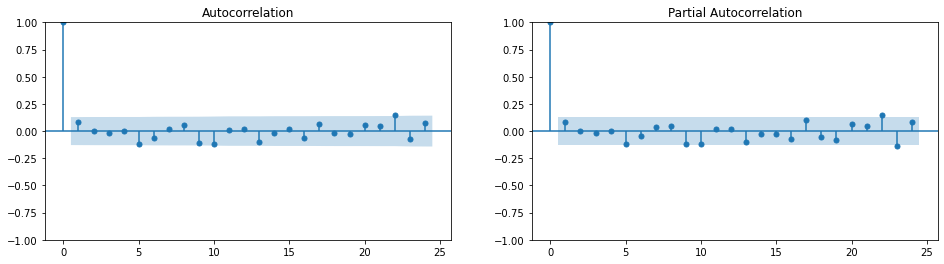

Residual Variance : 0.5776717291684457


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  233
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -247.042
Date:                Tue, 05 Mar 2024   AIC                            498.083
Time:                        11:55:33   BIC                            504.977
Sample:                             0   HQIC                           500.863
                                - 233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8111      0.042    -19.519      0.000      -0.893      -0.730
sigma2         0.4902      0.045     10.798      0.000       0.401       0.579
===================================================================================
Ljung-Box (L1) (Q):                   1.50   Jarque-Bera (JB):                 1.42
Prob(Q):                              0.22   Prob(JB):                         0.49
Heteroskedasticity (H):               1.70   Skew:                             0.19
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
# The ACF and PACF plots below are showing that the correlation present in the previous plots has been eliminated after the addition of the
# MA term. Even though the residuals plot is showing a slightly worrisome wandering away from the mean (see next block), the variance of the 
# residuals has been decreased and the MA term of the model is significantly different to zero. Hence, we decide to continue with this 
# model (the model structure is : Y^_t = Y_(t-1) - ma.L1*e_(t-1), where e_(t-1) = Y^_(t-1) - Y_(t-1)).
from statsmodels.tsa.arima.model import ARIMA

# Model 
model = ARIMA(endog = montreal.values, order = (0,1,1))
model_fit = model.fit()
pred = model_fit.predict()# In-sample predictions for the whole dataset. To each step the real measurement is added and a prediction is performed. 
res = montreal.values - pred

## Plot the ACF & PACF plots
fig,axs = plt.subplots(nrows = 1,ncols=2, figsize = (16,4))
plot_acf(res[1:], ax = axs[0])
plot_pacf(res[1:], ax = axs[1])
plt.show()

print(f'Residual Variance : {np.var(res)}')
model_fit.summary()

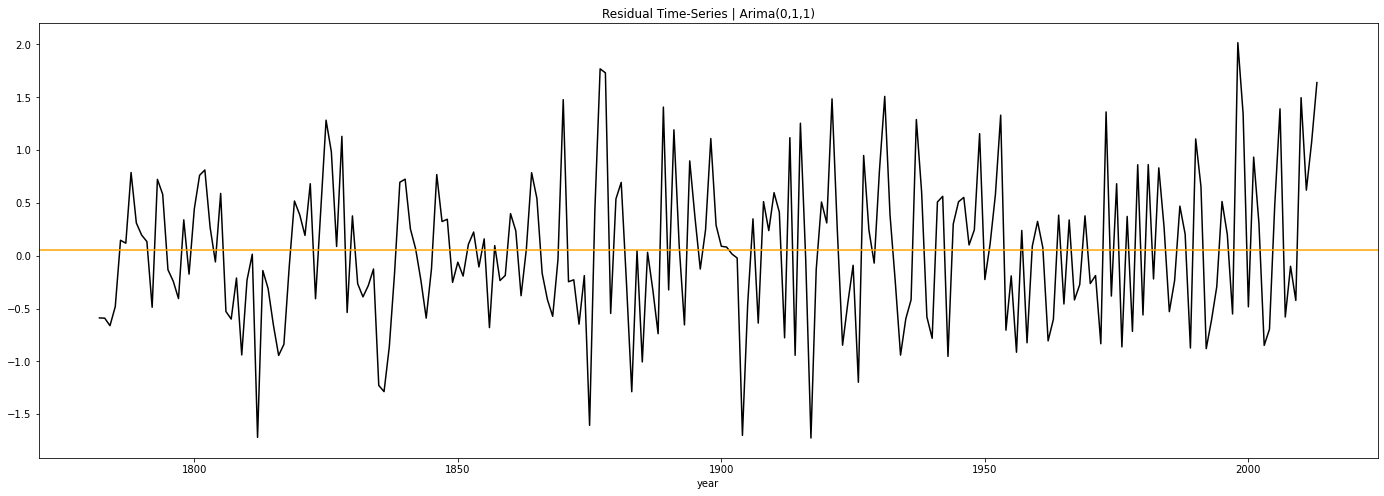

In [26]:
pd.Series(index = montreal.index[1:], data = res[1:]).plot(figsize = (24,8), title = ('Residual Time-Series | Arima(0,1,1)'), color = 'black')
plt.axhline(np.mean(res[1:]), color = 'orange')
plt.show()

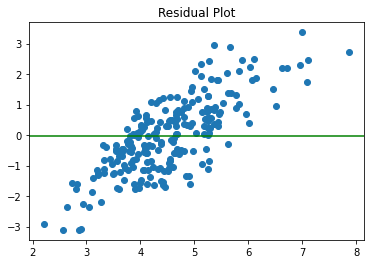

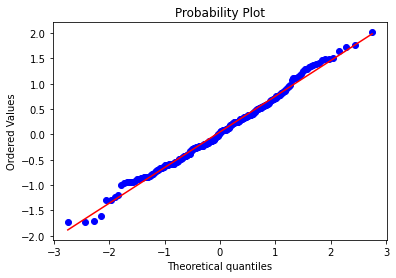

In [25]:
import pylab 
import scipy.stats as stats

# Even though homoscedasticity is not satisfied as the residuals are increasing when the actual temperature is becoming greater, 
# i.e there is an increasing trend, from the probabibility plot we can see that residuals are following a normal distribution 
# which is an essential assumption for procceeding with testing the model.

# Standarising the residuals for preventing large values from affecting our analysis
standarised_res = (res-np.mean(res))/np.var(res)

# Plot
fig, axs = plt.subplots(nrows = 1, ncols = 1)

# Residual plot
axs.scatter(x = montreal.values[1:], y = standarised_res[1:])
axs.axhline(y = np.mean(standarised_res[1:]), color = 'green')
axs.set_title('Residual Plot')
plt.show()

# QQ-plot of the residuals
stats.probplot(res[1:], dist="norm", plot=pylab)
pylab.show()

In [26]:
import warnings
warnings.filterwarnings('ignore') 
# Testing our model.

# Train and Test Set.
montreal_train = montreal[:round(len(montreal)*0.9)].reset_index()# We select 90% of the data available for training
montreal_test = montreal[round(len(montreal)*0.9):].reset_index()

# In-Sample Forecasting step-by-step.
pred = [0 for i in range(len(montreal_test))]
for i in range(len(montreal_test)):
    model = ARIMA(montreal_train['AverageTemperature'], order = (0,1,1))
    fitted = model.fit()
    pred[i] = fitted.forecast().values[0]
    montreal_train.loc[len(montreal_train)+i,'AverageTemperature'] = montreal_test.loc[i,'AverageTemperature']
    montreal_train.loc[len(montreal_train)+i,'year'] = montreal_test.loc[i,'year']

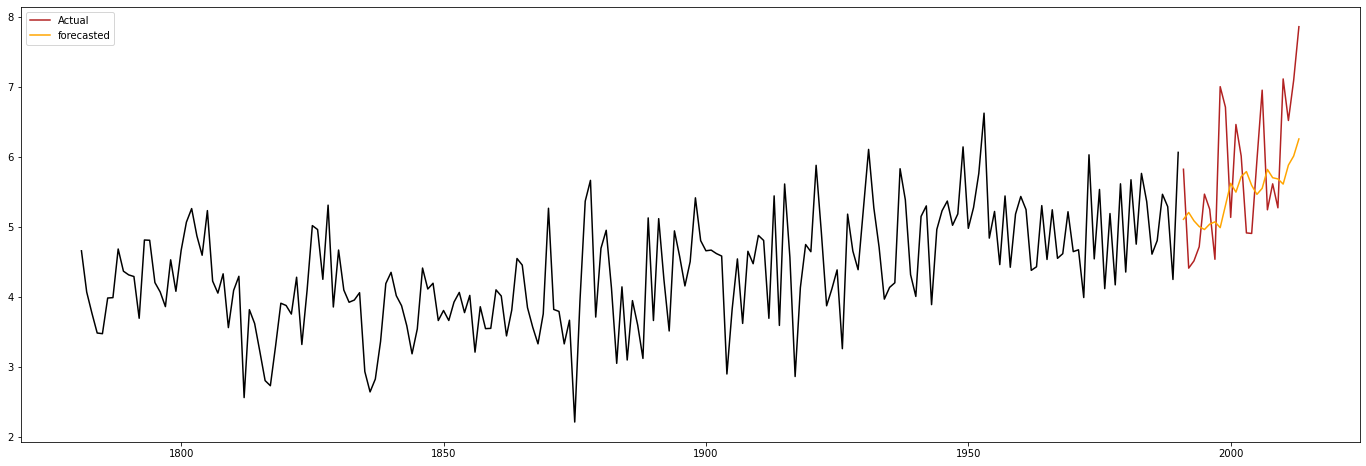

In [30]:
# Plot the results. Our model can predict the general increasing trend of the average temperature in the years under consideration,
# while it seems that it does not overfit the data given for training. However, it cannot capture the magnitude of the fluctuations
# and slightly misses out the year-to-year increase or decrease in the figure of temperature. We however keep in mind that this does 
# not constitute a long-term forecasting.
forecast_on_test = pd.Series(index = montreal_test['year'], data = pred)

plt.figure(figsize = (24,8)) 
plt.plot(montreal.iloc[:round(len(montreal)*0.9)], color = 'black')
plt.plot(montreal.iloc[round(len(montreal)*0.9):], color = 'firebrick',label = 'Actual')
plt.plot(forecast_on_test, color = 'orange', label = 'forecasted')
plt.legend()
plt.show()

In [29]:
# Lets formulate few basic metrics for assessing the performance of our model
def metrics_of_accuracy(pred, actual):
    me = np.mean(pred - actual) # Mean Error
    mae = np.mean(np.abs(pred - actual)) # Mean Absolute Error
    mpe = np.mean((pred - actual)/actual)*100# Mean Percentage Error
    mape = np.mean(np.abs((pred - actual)/actual))*100# Mean Absolute Percentage Error
    corr = np.corrcoef(pred, actual)[0,1]# Correlation between predictions and actual values
    return (pd.DataFrame({'Mean Error' : me, 'Mean Absolute Error' : mae, 'Mean Percentage Error  (%)' : mpe,
             'Mean Absolute Percentage Error (%)' :  mape, 'Correlation' : corr}, index = [0]))

metrics_of_accuracy(pred,montreal.values[round(len(montreal)*0.9):])

,Mean Error,Mean Absolute Error,Mean Percentage Error(%),Mean Absolute Percentage Error (%),Correlation
0,-0.32625,0.788447,-3.463446,13.046728,0.456194


In [30]:
# We calculate the same accuracy measures but for a range of AR terms to check whether the possibility of adding such terms would
# ameliorate the performance. We see that even though there is a small imporvement in the correaltion and the MAPE when an AR term 
# is introduced, that is not the case for the ME and MPE. We can investigate introducing AR terms to the model further, but for now,
# we proceed with the monthly investigation of the Montreal's temperature.
frames = [0 for i in range(4)]
for i in range(0,4,1):
    montreal_train = montreal[:round(len(montreal)*0.9)].reset_index()# We select 90% of the data available for training
    montreal_test = montreal[round(len(montreal)*0.9):].reset_index()
    pred = [0 for k in range(len(montreal_test))]
    for j in range(len(montreal_test)):
        model = ARIMA(montreal_train['AverageTemperature'], order = (i,1,1))
        fitted = model.fit()
        pred[j] = fitted.forecast().values[0]
        montreal_train.loc[len(montreal_train)+j,'AverageTemperature'] = montreal_test.loc[j,'AverageTemperature']
        montreal_train.loc[len(montreal_train)+j,'year'] = montreal_test.loc[j,'year']
    frames[i] = metrics_of_accuracy(pred,montreal.values[round(len(montreal)*0.9):])

pd.concat(frames).reset_index().drop('index', axis = 1)

,Mean Error,Mean Absolute Error,Mean Percentage Error(%),Mean Absolute Percentage Error (%),Correlation
0,-0.326250,0.788447,-3.463446,13.046728,0.456194
1,-0.381691,0.779729,-4.451922,12.744822,0.499242
2,-0.384768,0.781806,-4.523814,12.788721,0.490150
3,-0.384389,0.781610,-4.517230,12.785809,0.490797


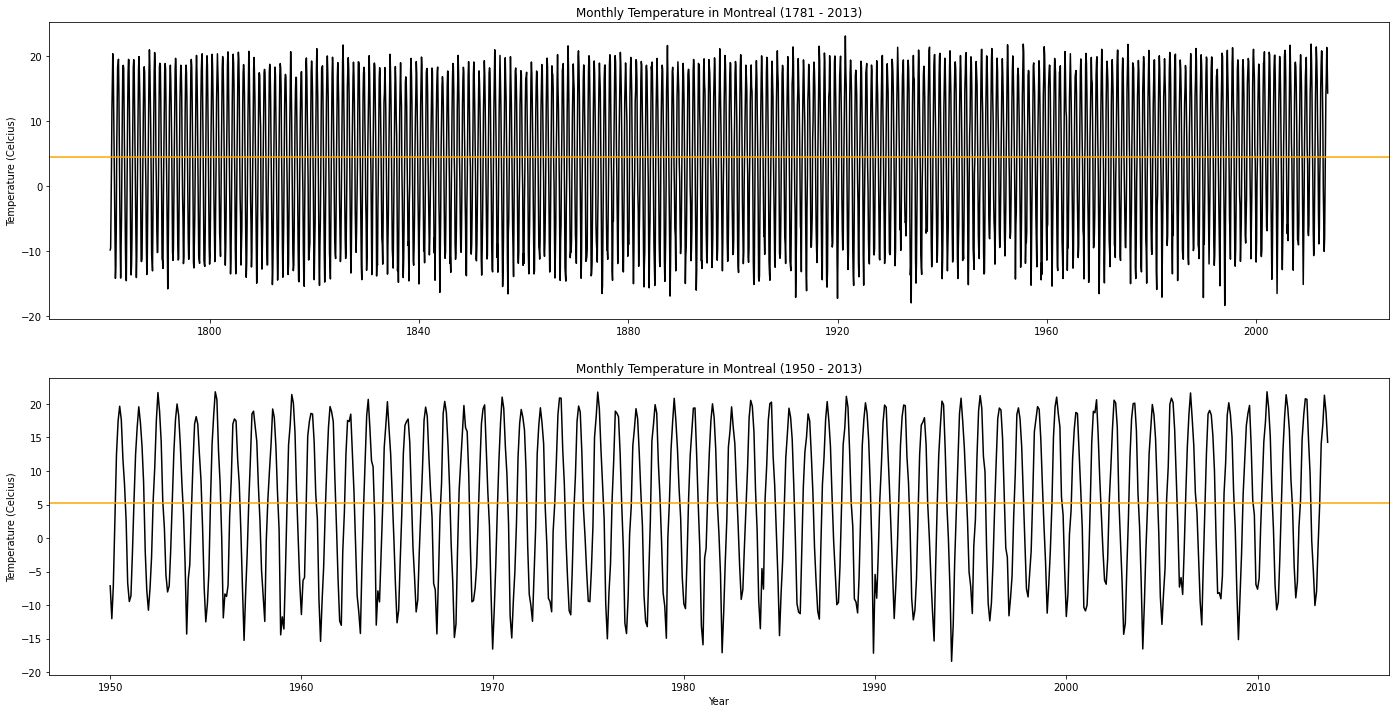

In [31]:
# Monthly Investigation.
# Here we start our deroute for investigating Montreal's temperature per month, aiming to prove that the 
# standard seasonal/weather correlation between the same months or seasons holds in our dataset as well and to perform 
# prediction analysis. Plotting the series below, a clear seasonal pattern is observed while, in the first plot we observe
# slight upward trend, in fact slightly less spikes occur in the low temperatures.

montreal_monthly = temps.loc[(temps["City"] == 'Montreal') & (temps['year']> 1780), ['dt','year','month','AverageTemperature']].reset_index().drop('index', axis = 1)

montreal_monthly_series = pd.Series(index = np.array(montreal_monthly['dt']), 
                                    data = np.array(montreal_monthly["AverageTemperature"]),
                                   name = "AverageTemperature")

fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (24,12))

axs[0].plot(montreal_monthly_series, color = 'black')
axs[0].axhline(np.mean(montreal_monthly_series.values), color = 'orange')
axs[1].plot(montreal_monthly_series[montreal_monthly_series.index >= '1950-01-01'],color = 'black')
axs[1].axhline(np.mean(montreal_monthly_series[montreal_monthly_series.index >= '1950-01-01'].values), color = 'orange')
axs[0].set_title('Monthly Temperature in Montreal (1781 - 2013)')
axs[0].set_ylabel('Temperature (Celcius)')
axs[1].set_title('Monthly Temperature in Montreal (1950 - 2013)')
axs[1].set_ylabel('Temperature (Celcius)')
axs[1].set_xlabel('Year')

plt.show()

In [32]:
# Seasonal Differencing. Instead of subtracting a time-series with its 1-Lag, we generalise the concept and we subtract any k-lag
# This will allow us to mitigate the seasonal pattern seen in the plot above.
def seasonal_differencing(df, lag) :
    s_differenced = [0 for i in range(0,len(df)-lag,1)]
    for i in range(0,len(df)-lag,1):
            s_differenced[i] = df.iloc[i+lag] - df.iloc[i]
    return pd.Series(index = df.index[lag:] ,data = s_differenced, name = 'AverageTemperature')

def multiple_s_differencing(df,lag, times):
    for i in range(times):
        df = seasonal_differencing(df,lag)
    return df

Text(0.5, 0, 'Year')

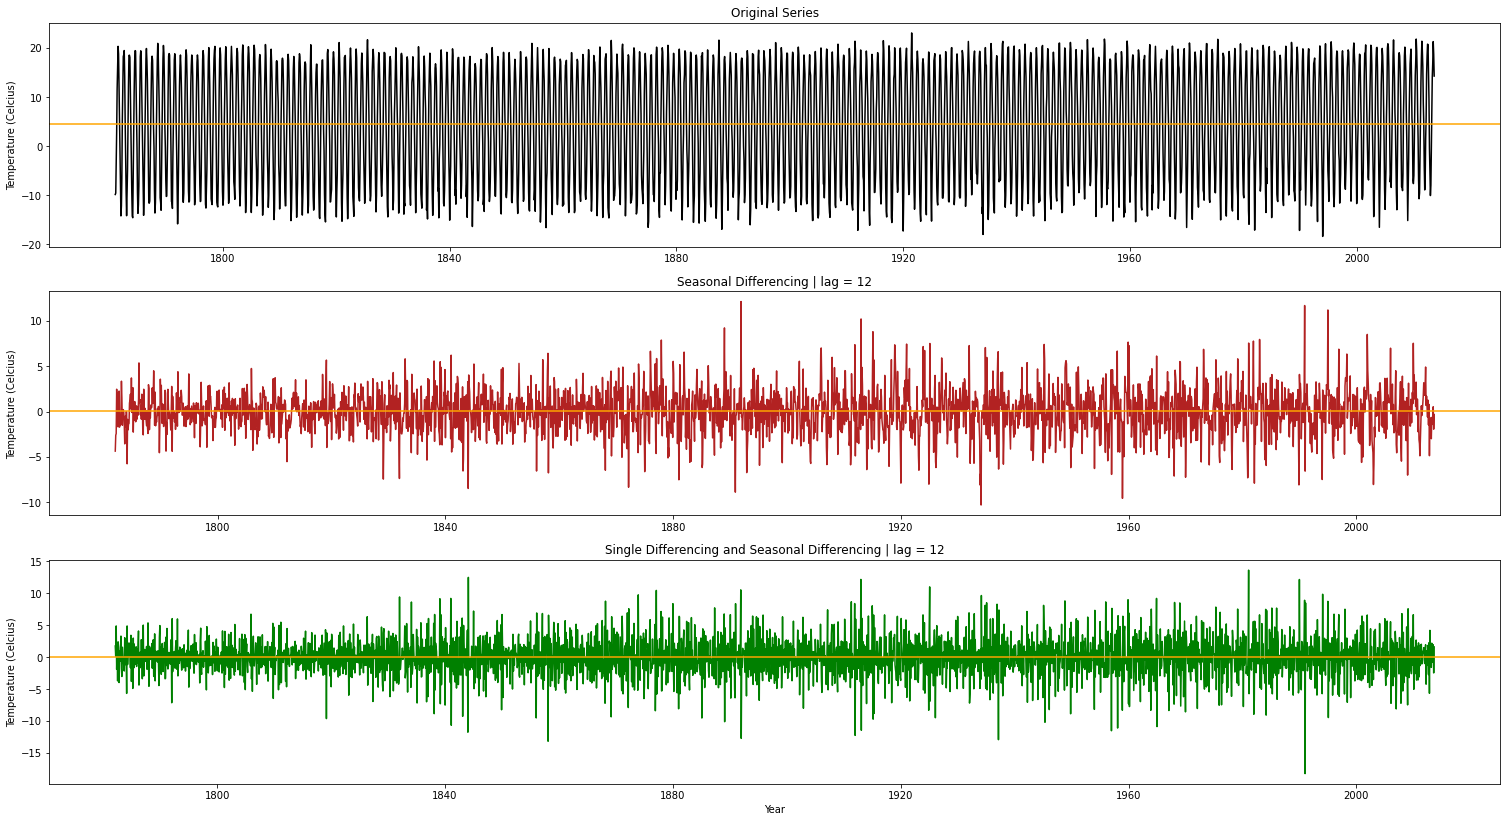

In [49]:
# Lets denote the times of non-seasonal differencing by d, and the times of seasonal differencing by D. As there is clear seasonal
# pattern and our data consists of monthly temperatures, we start by applying seasonal differencing of period 12 (handled by the
# variable 'times' in the functions above). 

montreal_monthly_series_diff = multiple_differencing(montreal_monthly_series,1)# Single Differencing

montreal_monthly_series_s_diff = multiple_s_differencing(montreal_monthly_series,12,1)# Subtracting Average Temperatures every 12 months (D = 1) 

montreal_monthly_series_s_diff_1 = multiple_differencing(montreal_monthly_series_s_diff,1)# Single differencing (d = 1) 

# Plot the three time series. The original, the one-time seasonally differenced, and finally, the latter non-seasonally differenced once. 
# We can see that the spikes are less present 
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (26,14))

axs[0].plot(montreal_monthly_series, color = 'black')
axs[0].set_title('Original Series')
axs[0].axhline(np.mean(montreal_monthly_series), color = 'orange')
axs[0].set_ylabel('Temperature (Celcius)')

axs[1].plot(montreal_monthly_series_s_diff,color = 'firebrick')
axs[1].axhline(np.mean(montreal_monthly_series_s_diff), color = 'orange')
axs[1].set_title('Seasonal Differencing | lag = 12')
axs[1].set_ylabel('Temperature (Celcius)')

axs[2].plot(montreal_monthly_series_s_diff_1, color = 'green')
axs[2].axhline(np.mean(montreal_monthly_series_s_diff_1), color = 'orange')
axs[2].set_title('Single Differencing and Seasonal Differencing | lag = 12')
axs[2].set_ylabel('Temperature (Celcius)')
axs[2].set_xlabel('Year')

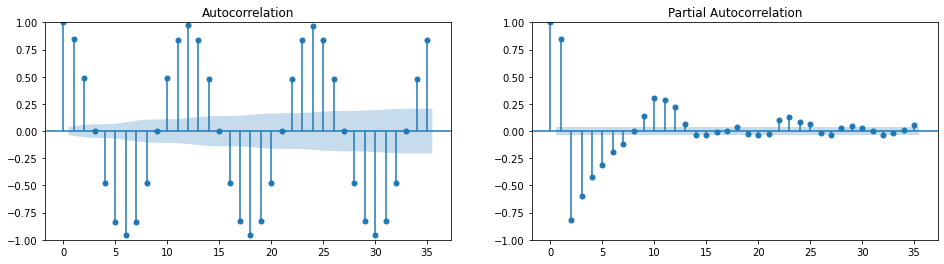

In [47]:
# ACF and PACF plots of the original series.
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16,4))
plot_acf(montreal_monthly_series, ax = axs[0])
plot_pacf(montreal_monthly_series, ax = axs[1])
plt.show()

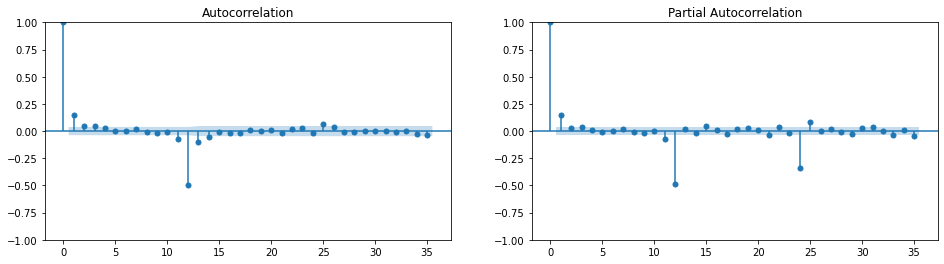

In [51]:
# ACF and PACF plots after single seasonal differencing with 12-lag. The negative lags multiple to 12-lag in the PACF plot imply that
# the series is probalbly slightly 'seasonally over-differenced' and then a SMA term could possibly mitigate this behaviour. Moreover, the 
# positive 1-lag in the PACF implies that the series is 'non-seasonally underdifferenced', hence an AR term could help in this issue. 
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16,4))
plot_acf(montreal_monthly_series_s_diff, ax = axs[0])
plot_pacf(montreal_monthly_series_s_diff, ax = axs[1])
plt.show()

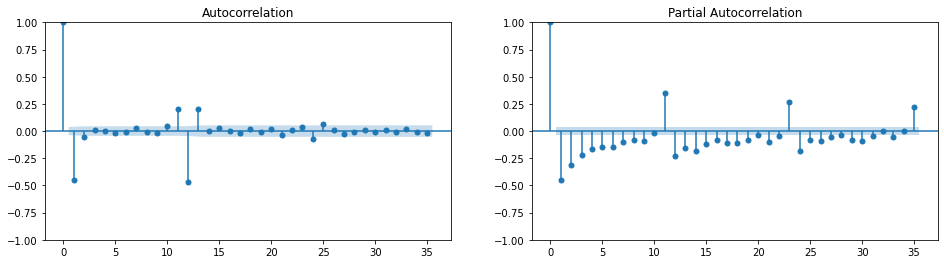

In [52]:
# ACF and PACF plots of order-1 non-seasonal differencing of the already seasonal differenced series. Not satisfying results.
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16,4))
plot_acf(montreal_monthly_series_s_diff_1, ax = axs[0])
plot_pacf(montreal_monthly_series_s_diff_1, ax = axs[1])
plt.show()

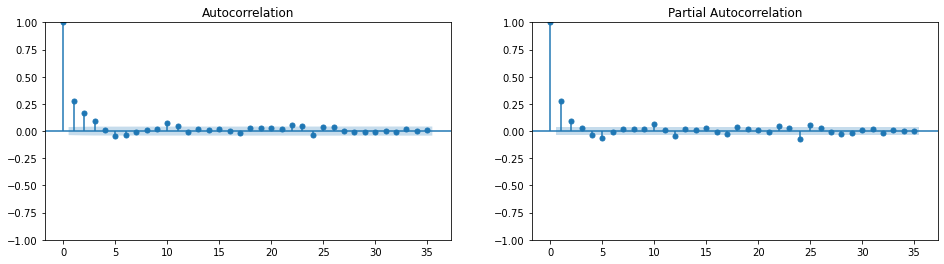

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:       AverageTemperature   No. Observations:                 2793
Model:             ARIMA(0, 1, [1], 12)   Log Likelihood               -5531.546
Date:                  Tue, 05 Mar 2024   AIC                          11067.092
Time:                          13:37:43   BIC                          11078.953
Sample:                      01-01-1781   HQIC                         11071.375
                           - 09-01-2013                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9485      0.006   -153.550      0.000      -0.961      -0.936
sigma2         3.0966      0.065     47.677      0.000       2.969       3.224
===================================================================================
Ljung-Box (L1) (Q):                  79.15   Jarque-Bera (JB):               204.34
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.74   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
# We first check the autocorrelations after only adding an SMA term. We can see that the multipe to 12-lags correaltions have been
# eliminated, however there is now an even stronger presence of positive autocorrealtion and partial auto-correlation with the first 
# couple of lags. Hence, we employ the afforementioned strategy, namely of adding an AR term.
s_model = ARIMA(endog = montreal_monthly_series, order = (0,0,0), seasonal_order = (0,1,1,12))
s_fitted = s_model.fit()
s_pred = s_fitted.predict()
s_res = montreal_monthly_series.values - s_pred

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16,4))
plot_acf(s_res, ax = axs[0])
plot_pacf(s_res, ax = axs[1])
plt.show()

s_fitted.summary()

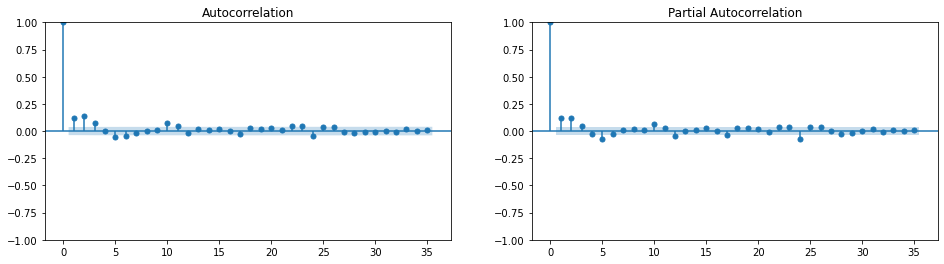

In [102]:
# The positive autocorrealtion with the first few lags has been mitigated, but is still significantly non-zero and therefore 
# suggests an extra addition of an AR-term.
s_model = ARIMA(endog = montreal_monthly_series, order = (1,0,0), seasonal_order = (0,1,1,12))
s_fitted = s_model.fit()
s_pred = s_fitted.predict()
s_res = montreal_monthly_series.values - s_pred

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16,4))
plot_acf(s_res, ax = axs[0])
plot_pacf(s_res, ax = axs[1])
plt.show()

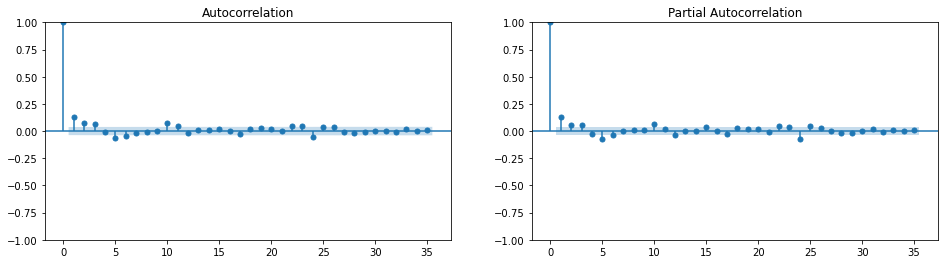

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                 AverageTemperature   No. Observations:                 2793
Model:             ARIMA(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood               -5480.894
Date:                            Fri, 16 Feb 2024   AIC                          10969.789
Time:                                    16:22:39   BIC                          10993.511
Sample:                                01-01-1781   HQIC                         10978.355
                                     - 09-01-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1641      0.016     10.498      0.000       0.134       0.195
ar.L2          0.0759      0.018      4.316      0.000       0.041       0.110
ma.S.L12      -0.9589      0.006   -168.425      0.000      -0.970      -0.948
sigma2         2.9829      0.061     48.738      0.000       2.863       3.103
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               264.14
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               1.74   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
# The autocorrelation with the first couple of lags is further mitigated but not significantly enough in order to totally justify the 
# addition of an extra AR-term.
s_model = ARIMA(endog = montreal_monthly_series, order = (2,0,0), seasonal_order = (0,1,1,12))
s_fitted = s_model.fit()
s_pred = s_fitted.predict()
s_res = montreal_monthly_series.values - s_pred

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16,4))
plot_acf(s_res, ax = axs[0])
plot_pacf(s_res, ax = axs[1])
plt.show()

s_fitted.summary()

,Mean Error,Mean Absolute Error,Mean Percentage Error(%),Mean Absolute Percentage Error (%),Correlation
0,-0.129468,1.358864,1.502287,44.725961,0.985729


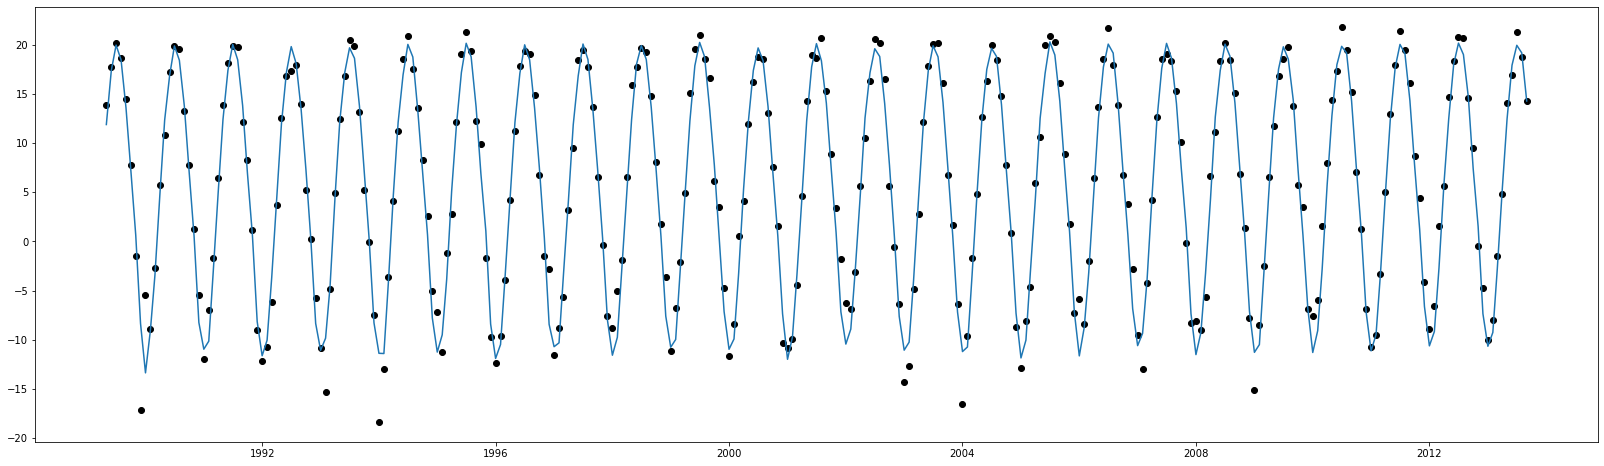

In [36]:
# As the predictions are on float numbers of many decimal places, the MAPE metric creates, almost necessarily, a rather high figure
# hence the metric of MAE is a more reliable one to count our assessment on.
s_model = ARIMA(endog = montreal_monthly_series, order = (1,0,0), seasonal_order = (0,1,1,12))
s_fitted = s_model.fit()
s_pred = s_fitted.predict()

plt.figure(figsize = (28,8))
plt.plot(pd.Series(index = montreal_monthly_series.index[2500:], data = s_pred[2500:]))
plt.scatter(y = montreal_monthly_series[2500:], x = montreal_monthly_series.index[2500:], color = 'black')

metrics_of_accuracy(s_pred, montreal_monthly_series.values)

In [90]:
# A fragment of the actual values and the relevant predictions.
pd.DataFrame({'Actual' : montreal_monthly_series[2750:], "Predictions" : s_pred[2750:]})

,Actual,Pred
2010-03-01,1.524,-2.798734
2010-04-01,7.946,5.708368
2010-05-01,14.379,12.760577
2010-06-01,17.331,17.942580
2010-07-01,21.811,19.812301
2010-08-01,19.421,19.132424
2010-09-01,15.174,14.264204
2010-10-01,7.027,7.454325
2010-11-01,1.253,0.928802
2010-12-01,-6.906,-7.185049


In [135]:
#train_monthly_set =  montreal_monthly_series[:round(len(montreal_monthly_series)*0.999)].reset_index()
train_monthly_set =  montreal_monthly_series[:len(montreal_monthly_series) - 12].reset_index()
test_monthly_set = montreal_monthly_series[len(train_monthly_set):].reset_index()

model = ARIMA(train_monthly_set["AverageTemperature"], order = (1,0,0), seasonal_order = (0,1,1,12))
fitted = model.fit()
pred = fitted.forecast(steps = 12)
pd.DataFrame({'Actual' : test_monthly_set["AverageTemperature"], "Pred" : pred.values})


RangeIndex(start=2781, stop=2793, step=1)

In [158]:
test_monthly_set.index = montreal_monthly_series.index[len(montreal_monthly_series)-12:]
pred.index = montreal_monthly_series.index[len(montreal_monthly_series)-12:]

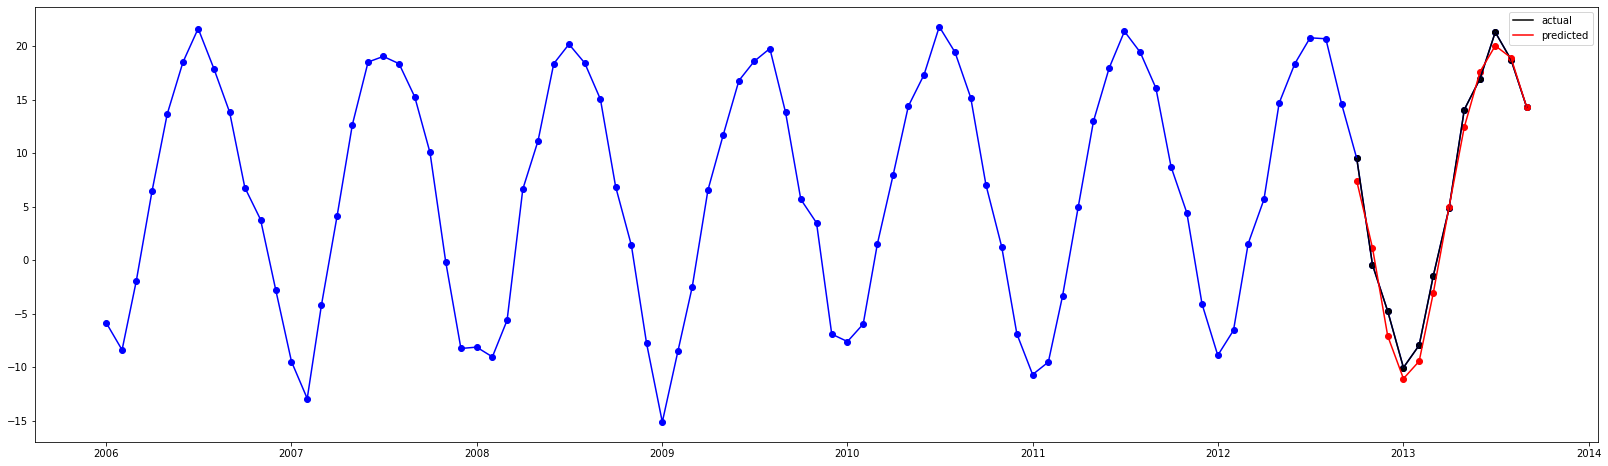

In [165]:
# In the plot below, we gather the out-of-sample forecasts for the last 12 months of our dataset based on a SARIMA model of the form 
# y^{-}_t = AR_1*y_(t-1) + w_t + SMA_1*w_(t-12). The result is satisfying, however there is a possibility of overfitting and futher
# examination of ways to enhance the model performance might be required. 
plt.figure(figsize = (28,8))
plt.plot(pd.Series(index = montreal_monthly_series.index[2700:], data = montreal_monthly_series.values[2700:]),color = 'blue')
plt.scatter(x = montreal_monthly_series.index[2700:], y = montreal_monthly_series.values[2700:],color = 'blue')
plt.plot(test_monthly_set, color = 'black', label = 'actual')
plt.scatter(x = test_monthly_set.index, y = test_monthly_set.values, color = 'black')
plt.plot(pred, color = 'red', label = 'predicted')
plt.scatter(x = pred.index, y = pred.values, color = 'red')
plt.legend()
plt.show()